In [712]:
import pandas as pd
import numpy as np
import patsy
import scipy.stats as stats

import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression


import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_formats = ['svg']
%matplotlib inline

plt.rcParams['figure.figsize'] = (9, 6)


pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

sns.set(context='notebook', style='whitegrid', font_scale=1.2)

In [713]:
# get info:
df=pd.read_csv('df_all_stat.csv')

# Data Cleaning:

In [5]:
df1=df.copy()

In [10]:
dfA=df.copy()

In [7]:
df1.drop('Unnamed: 0', axis=1, inplace=True)

In [13]:
df1['Bathroom']=df1['Baths']+df1['Half_Bath_(F)']

In [12]:
#Checking for relevant number of entries for binary "dummy" columns:

df1.sum(axis=0)

URL                         https://www.elliman.com/newyorkcity/sales/deta...
Property_Type               Single Family HomeSingle Family HomeSingle Fam...
MLS/Listing_ID              3252464319120432267763220866322581132372443239...
Full_Street_Address         147-12 3rd Avenue138-34 10th Avenue2-43 150th ...
Neighborhood                WhitestoneWhitestoneWhitestoneWhitestoneWhites...
ZipCode                                                           1.46373e+07
Price                                                             1.21721e+09
Description                 Click for NYS Housing Discrimination Disclosur...
Dishwasher                                                                  0
beds                                                                     5382
Baths                                                                    3069
Interior                    3,000 \n\t\t\t\tSq Ft.2,800 \n\t\t\t\tSq Ft.3,...
Year_Built                                                      

In [19]:
#Creating X and y features using relevant data to begin analysis

df_y=df1['Price'].reset_index().copy()
df_X=df1[['beds', 'Year_Built', 'Bathroom', 'Patio', 'Air_Conditioning', 'Garage_-_Attached', 'Brick', 'Vinyl_(F)', 'Interior_Sq_Ft', 'Exterior_Acres', 'zipcode_median', 'Neighborhood_median', 'Miles to Penn Station', 'Fare Zone']].copy()
df2=df1[['Price', 'beds','Year_Built', 'Bathroom', 'Patio', 'Air_Conditioning', 'Garage_-_Attached', 'Brick', 'Vinyl_(F)', 'Interior_Sq_Ft', 'Exterior_Acres', 'zipcode_median', 'Neighborhood_median', 'Miles to Penn Station', 'Fare Zone']].copy()
                          
                          

In [24]:
df2.corr()

,Price,beds,Year_Built,Bathroom,Patio,Air_Conditioning,Garage_-_Attached,Brick,Vinyl_(F),Interior_Sq_Ft,Exterior_Acres,zipcode_median,Neighborhood_median,Miles to Penn Station,Fare Zone
Price,1.000000,0.402460,0.297136,0.591069,0.126524,0.128515,0.196999,0.227525,-0.092264,0.630408,0.387505,0.556748,0.618925,-0.249140,-0.268254
beds,0.402460,1.000000,0.236975,0.626246,-0.066010,-0.094894,-0.007516,0.008049,-0.016635,0.554850,0.160270,0.152211,0.104993,-0.051031,-0.090366
Year_Built,0.297136,0.236975,1.000000,0.400404,-0.009970,0.101310,0.217963,0.299488,-0.063479,0.313898,0.114400,0.082822,0.111912,0.092571,0.100290
Bathroom,0.591069,0.626246,0.400404,1.000000,0.060903,0.025091,0.091501,0.128270,0.004886,0.622816,0.269965,0.257807,0.246646,-0.065541,-0.071575
Patio,0.126524,-0.066010,-0.009970,0.060903,1.000000,0.201860,0.142653,0.093619,0.049659,0.101483,0.077829,0.172313,0.194744,-0.073710,-0.059138
Air_Conditioning,0.128515,-0.094894,0.101310,0.025091,0.201860,1.000000,0.073355,0.075221,0.005712,0.007202,0.136201,0.121765,0.133891,0.008126,0.031517
Garage_-_Attached,0.196999,-0.007516,0.217963,0.091501,0.142653,0.073355,1.000000,0.274418,-0.070722,0.168468,0.075931,0.225543,0.231100,-0.095941,-0.073236
Brick,0.227525,0.008049,0.299488,0.128270,0.093619,0.075221,0.274418,1.000000,-0.166531,0.161672,-0.009394,0.265760,0.219496,-0.167592,-0.173308
Vinyl_(F),-0.092264,-0.016635,-0.063479,0.004886,0.049659,0.005712,-0.070722,-0.166531,1.000000,-0.060641,-0.005745,-0.138780,-0.120457,0.112470,0.118640
Interior_Sq_Ft,0.630408,0.554850,0.313898,0.622816,0.101483,0.007202,0.168468,0.161672,-0.060641,1.000000,0.378286,0.263152,0.275558,-0.085720,-0.088126


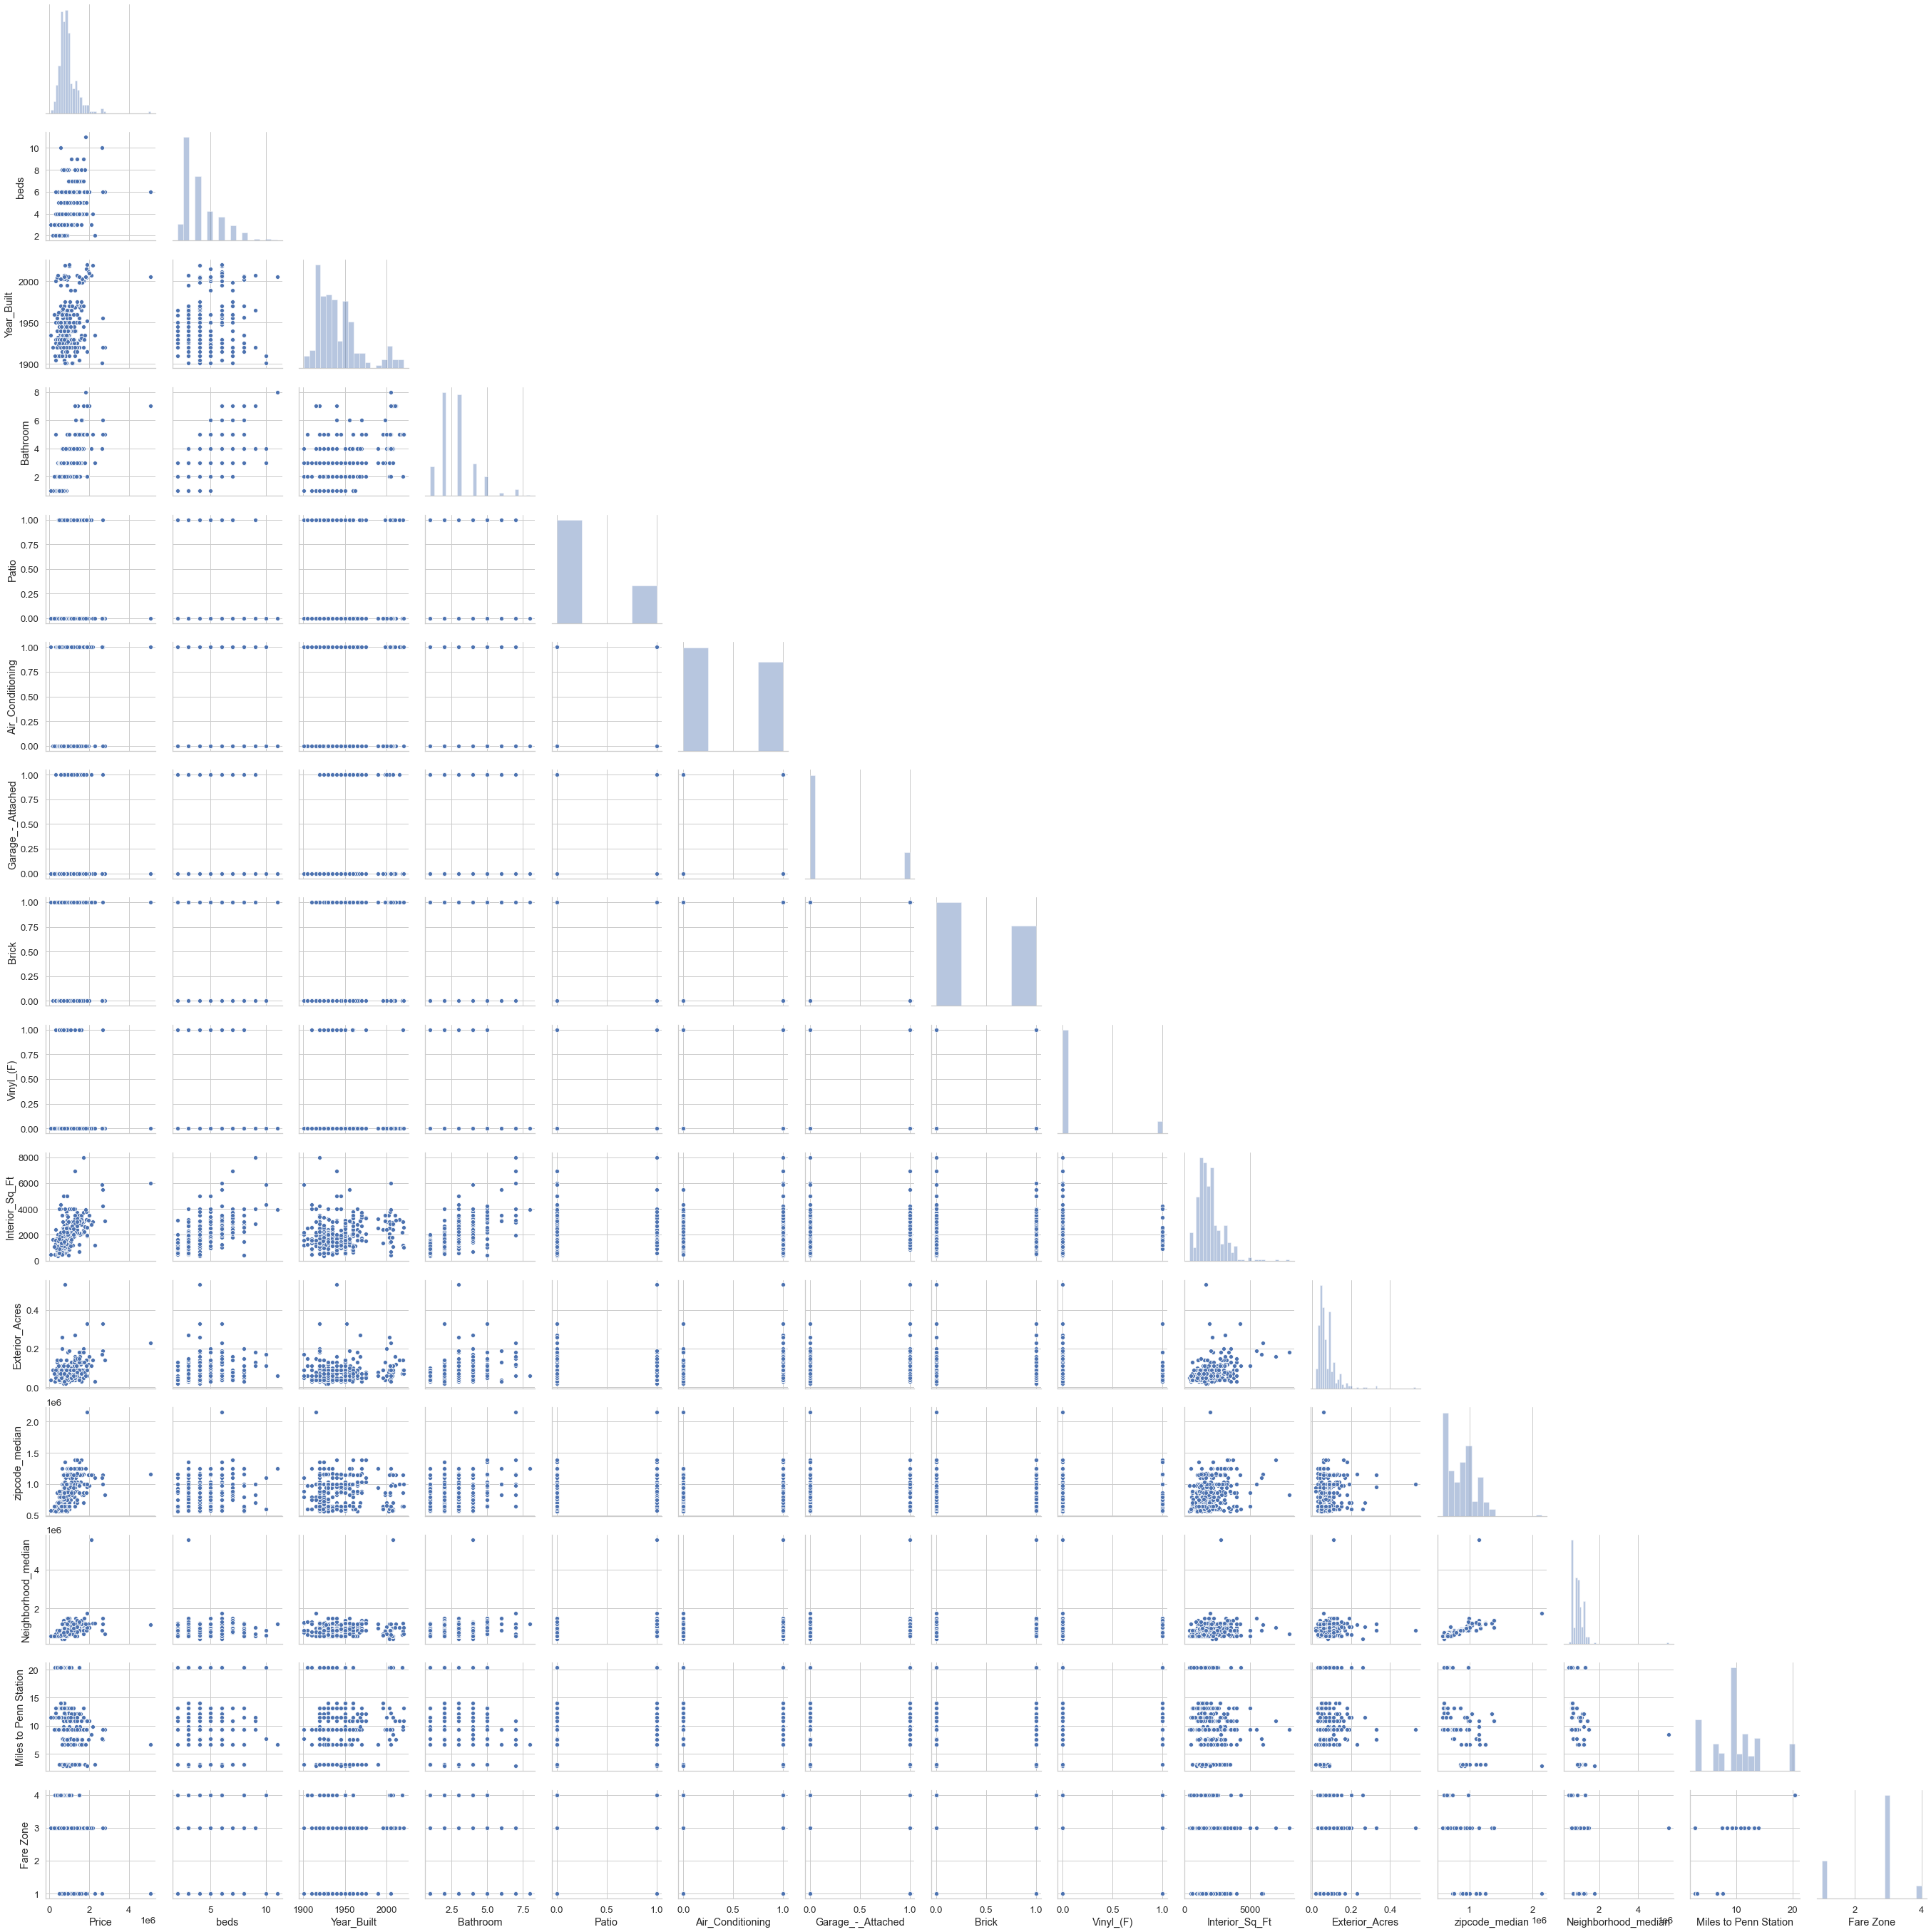

In [35]:
#sns.Pairplot to understand what I'm dealing with:

%config InlineBackend.figure_formats = ['png']

g = sns.PairGrid(df2.sample(frac=0.3), diag_sharey=False, corner=True)
g.map_lower(sns.scatterplot)
g.map_diag(sns.distplot, kde=False)

# Begin With Simple Linear Regression:

In [38]:
#Run Simple linear regression

df_lin_X=df_X.copy()
df_lin_y=df2['Price'].copy()
df_lin=df2.copy()

lr = LinearRegression()
fit = lr.fit(df_lin_X, df_lin_y)
print(lr.score(df_lin_X, df_lin_y))    

0.693799439286751


# Begin Addapting cross_validate() to allow for multi-use:

In [403]:
#Train simple linear regression against testing

from sklearn.model_selection import cross_validate

def cv_results(X, y, model=LinearRegression(normalize=True), scoring='r2', rounding=4, cv=5, minimize_score=False):
    '''
    For a set of features and target X, y, perform a 5 fold cross validation.
    Fit and validate a model, and report results
    Note: `sklearn.model_selection.cross_validate` defaults to 5 fold, 80/20 validation splits.
    '''
    
    model_cv = cross_validate(model, X, y, cv=cv, return_train_score=True, 
                              scoring=scoring, return_estimator=True)

    if minimize_score:
        select = model_cv['test_score'].argmin()
    else:
        select = model_cv['test_score'].argmax()

    final_model = model_cv['estimator'][select]
    
    # Capture the ratio between the train and test scores to understand possible under/over fitting
    model_cv['train_test_score_ratio'] = model_cv['train_score'] / model_cv['test_score']
    
    mean_score = round(model_cv['test_score'].mean(), rounding)
    min_score = round(model_cv['test_score'].min(), rounding)
    max_score = round(model_cv['test_score'].max(), rounding)
    
    mean_ratio = round(model_cv['train_test_score_ratio'].mean(), rounding)
    min_ratio = round(model_cv['train_test_score_ratio'].min(), rounding)
    max_ratio = round(model_cv['train_test_score_ratio'].max(), rounding)
    
    # report results
    print(f'Test {scoring} {":":<15} Mean = {mean_score}\tRange = ({min_score}, {max_score})')
    print(f'Train/Test {scoring} Ratio {":":<3} Mean = {mean_ratio}\tRange = ({min_ratio}, {max_ratio})')
    
    print('\n')
    print(f'Test Scores: {model_cv["test_score"]}')
    print(f'Train Scores: {model_cv["train_score"]}')
    print('\nBest Model Feature coefficient results:')
    for feat, coef in zip(X.columns, final_model.coef_):
        print(f'{feat + ":":<16} {coef:.2f}')


## Lots of overfitting occuring per linear regression analysis below:

In [48]:
df_lin_X=df_X.copy()
df_lin_y=df2['Price'].copy()
df_lin=df2.copy()

cv_results(df_lin_X, df_lin_y, model=LinearRegression(normalize=True), scoring='r2', rounding=4, cv=5, minimize_score=False)

Test r2 :               Mean = 0.4321	Range = (-0.0278, 0.6264)
Train/Test r2 Ratio :   Mean = -4.0007	Range = (-25.2899, 1.8139)


Test Scores: [ 0.62640696  0.59014008  0.5847681   0.38714997 -0.02781025]
Train Scores: [0.68312346 0.70025407 0.69907071 0.70226339 0.70331868]

Best Model Feature coefficient results:
beds:            10095.30
Year_Built:      566.74
Bathroom:        116659.31
Patio:           -47617.62
Air_Conditioning: 56278.20
Garage_-_Attached: 13430.62
Brick:           51616.49
Vinyl_(F):       2376.56
Interior_Sq_Ft:  112.39
Exterior_Acres:  1272619.43
zipcode_median:  0.52
Neighborhood_median: 0.48
Miles to Penn Station: 8007.94
Fare Zone:       -74933.01


## OLS Check to Understand Basic Stats:

In [42]:
#OLS check for results

df_lin_X=df_X.copy()
df_lin_y=df2['Price'].copy()
df_lin=df2.copy()

#Create the model
model = sm.OLS(df_lin_y, sm.add_constant(df_lin_X)) 

#Fit
fit = model.fit()

#Print out summary
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     205.2
Date:                Thu, 08 Oct 2020   Prob (F-statistic):          1.40e-313
Time:                        00:05:45   Log-Likelihood:                -18078.
No. Observations:                1283   AIC:                         3.619e+04
Df Residuals:                    1268   BIC:                         3.626e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -2.469e+06   7.38e+05     -3.346      0.001   -3.92e+06   -1.02e+06
beds                   3480.9735   7546.732      0.461      0.645   -1.13e+04    1.83e+04
Year_Built             1012.7243    386.828      2.618      0.009     253.831    1771.617
Bathroom               1.048e+05   1.06e+04      9.853      0.000    8.39e+04    1.26e+05
Patio                 -3.459e+04   2.13e+04     -1.625      0.104   -7.63e+04    7174.386
Air_Conditioning       4.844e+04   1.89e+04      2.556      0.011    1.13e+04    8.56e+04
Garage_-_Attached     -1.208e+04   2.44e+04     -0.496      0.620   -5.99e+04    3.57e+04
Brick                  2.831e+04   2.04e+04      1.386      0.166   -1.18e+04    6.84e+04
Vinyl_(F)             -3786.3677   2.91e+04     -0.130      0.897    -6.1e+04    5.34e+04
Interior_Sq_Ft          154.2665     12.725     12.123      0.000     129.303     179.230
Exterior_Acres         1.877e+06   1.94e+05      9.654      0.000     1.5e+06    2.26e+06
zipcode_median            0.2545      0.062      4.077      0.000       0.132       0.377
Neighborhood_median       0.6668      0.044     15.041      0.000       0.580       0.754
Miles to Penn Station  6064.2984   3513.765      1.726      0.085    -829.133     1.3e+04
Fare Zone             -7.588e+04    1.7e+04     -4.462      0.000   -1.09e+05   -4.25e+04
==============================================================================
Omnibus:                      816.660   Durbin-Watson:                   1.744
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            37807.978
Skew:                           2.305   Prob(JB):                         0.00
Kurtosis:                      29.191   Cond. No.                     1.05e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Ridge Analysis Using cross_validation() Method:

In [53]:
from sklearn.linear_model import RidgeCV
df_ridge_X=df_X.copy()
df_ridge_y=df2['Price'].copy()
df_ridge=df2.copy()

clf = RidgeCV(normalize=True, cv=5, scoring='r2').fit(df_ridge_X, df_ridge_y)
clf.score(df_ridge_X, df_ridge_y)
clf.get_params()
clf.coef_

TypeError: 'RidgeCV' object is not subscriptable

## Continued Overfitting:

In [54]:
cv_results(df_ridge_X, df_ridge_y, model=RidgeCV(normalize=True))

Test r2 :               Mean = 0.4664	Range = (0.0892, 0.6187)
Train/Test r2 Ratio :   Mean = 2.5831	Range = (1.1013, 7.8492)


Test Scores: [0.61868222 0.58165608 0.61334736 0.42929486 0.08923026]
Train Scores: [0.68132907 0.69748635 0.69629434 0.70013073 0.700382  ]

Best Model Feature coefficient results:
beds:            17131.46
Year_Built:      716.82
Bathroom:        104247.15
Patio:           -35679.62
Air_Conditioning: 53663.15
Garage_-_Attached: 17263.04
Brick:           52605.88
Vinyl_(F):       -274.41
Interior_Sq_Ft:  105.32
Exterior_Acres:  1224572.61
zipcode_median:  0.49
Neighborhood_median: 0.47
Miles to Penn Station: 3832.82
Fare Zone:       -60041.24


In [56]:
from sklearn.linear_model import LassoCV
df_lasso_X=df_X.copy()
df_lasso_y=df2['Price'].copy()
df_lasso=df2.copy()

cv_results(df_lasso_X, df_lasso_y, model=LassoCV(normalize=True))

Test r2 :               Mean = 0.4523	Range = (-0.021, 0.6217)
Train/Test r2 Ratio :   Mean = -5.7137	Range = (-33.4872, 1.4929)


Test Scores: [ 0.61756172  0.57529461  0.62168528  0.46792875 -0.02100235]
Train Scores: [0.67712501 0.69902314 0.69274678 0.69858568 0.70330989]

Best Model Feature coefficient results:
beds:            0.00
Year_Built:      751.33
Bathroom:        109890.99
Patio:           -0.00
Air_Conditioning: 7996.91
Garage_-_Attached: 0.00
Brick:           0.00
Vinyl_(F):       -0.00
Interior_Sq_Ft:  134.76
Exterior_Acres:  2091627.57
zipcode_median:  0.24
Neighborhood_median: 0.65
Miles to Penn Station: -0.00
Fare Zone:       -42225.44


# Improvement occured but none seem to be working well. Apply polynomial analysis:

In [70]:
# Scrap paper to help figure out how to adjust cross_validate() below

from sklearn.preprocessing import PolynomialFeatures

df_poly_X=df_X.copy()
df_poly_y=df2['Price'].copy()
df_poly=df2.copy()

p = PolynomialFeatures()
X_poly = p.fit_transform(df_poly_X)

lr_full = LinearRegression()
lr_full.fit(X_poly, df_poly_y)
lr_full.score(X_poly, df_poly_y)

features = DataFrame(p.transform(data), columns=p.get_feature_names(data.columns))


Test r2 :               Mean = 0.6424	Range = (0.4843, 0.7597)
Train/Test r2 Ratio :   Mean = 1.3278	Range = (1.0684, 1.7147)


Test Scores: [0.75966895 0.68644626 0.64371495 0.63804236 0.48429485]
Train Scores: [0.81165949 0.84930066 0.84186169 0.83652886 0.83040159]

Best Model Feature coefficient results:


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [714]:
#Apply fixed Cross Validate:

from sklearn.model_selection import cross_validate

def poly_cv_results(X, y, features, model=LinearRegression(normalize=True), scoring='r2', rounding=4, cv=5, minimize_score=False):
    '''
    For a set of features and target X, y, perform a 5 fold cross validation.
    Fit and validate a model, and report results
    Note: `sklearn.model_selection.cross_validate` defaults to 5 fold, 80/20 validation splits.
    
    Model options: LinearRegression(), LassoCV(), RidgeCV()
    '''
    
    model_cv = cross_validate(model, X, y, cv=cv, return_train_score=True, 
                              scoring=scoring, return_estimator=True)

    if minimize_score:
        select = model_cv['test_score'].argmin()
    else:
        select = model_cv['test_score'].argmax()

    final_model = model_cv['estimator'][select]
    
    # Capture the ratio between the train and test scores to understand possible under/over fitting
    model_cv['train_test_score_ratio'] = model_cv['train_score'] / model_cv['test_score']
    
    mean_score = round(model_cv['test_score'].mean(), rounding)
    min_score = round(model_cv['test_score'].min(), rounding)
    max_score = round(model_cv['test_score'].max(), rounding)
    
    mean_ratio = round(model_cv['train_test_score_ratio'].mean(), rounding)
    min_ratio = round(model_cv['train_test_score_ratio'].min(), rounding)
    max_ratio = round(model_cv['train_test_score_ratio'].max(), rounding)
    
    # report results
    print(f'Test {scoring} {":":<15} Mean = {mean_score}\tRange = ({min_score}, {max_score})')
    print(f'Train/Test {scoring} Ratio {":":<3} Mean = {mean_ratio}\tRange = ({min_ratio}, {max_ratio})')
    
    print('\n')
    print(f'Test Scores: {model_cv["test_score"]}')
    print(f'Train Scores: {model_cv["train_score"]}')
    print('\nBest Model Feature coefficient results:')
    for feat, coef in zip(p.get_feature_names(features.columns), final_model.coef_):
        print(f'{feat + ":":<16} {coef:.2f}')


Please scroll through red warnings to view results:

In [716]:
df_poly_X=df_X.copy()
df_poly_y=df2['Price'].copy()
df_poly=df2.copy()

p = PolynomialFeatures()
X_poly = p.fit_transform(df_poly_X)
p.get_feature_names(df_poly_X.columns)
poly_cv_results(X_poly,df_poly_y, df_poly_X, LassoCV(normalize=True))

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23542338820.90625, tolerance: 21269279969.732464
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25903652415.88672, tolerance: 21269279969.732464
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24929133753.859375, tolerance: 21269279969.732464
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 54411606454.0625, tolerance: 34039492049.01294
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56458024244.140625, tolerance: 34039492049.01294
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 55138984482.47656, tolerance: 34039492049.01294
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: Co

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30827113271.09375, tolerance: 27321940597.757282
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 34789669826.84375, tolerance: 33629564587.092976
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 40182979310.09375, tolerance: 33629564587.092976
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525:

Test r2 :               Mean = 0.6565	Range = (0.47, 0.7888)
Train/Test r2 Ratio :   Mean = 1.3118	Range = (1.0371, 1.7747)


Test Scores: [0.78879528 0.69422607 0.66360674 0.66590838 0.46995844]
Train Scores: [0.81806496 0.84099005 0.84288679 0.84282151 0.83403816]

Best Model Feature coefficient results:
1:               0.00
beds:            1635.11
Year_Built:      0.00
Bathroom:        0.00
Patio:           0.00
Air_Conditioning: -0.00
Garage_-_Attached: 0.00
Brick:           -0.00
Vinyl_(F):       0.00
Interior_Sq_Ft:  0.00
Exterior_Acres:  0.00
zipcode_median:  0.00
Neighborhood_median: 0.00
Miles to Penn Station: 0.00
Fare Zone:       37326.27
beds^2:          0.00
beds Year_Built: 0.00
beds Bathroom:   0.00
beds Patio:      1131.73
beds Air_Conditioning: 8295.31
beds Garage_-_Attached: -0.00
beds Brick:      -0.00
beds Vinyl_(F):  0.00
beds Interior_Sq_Ft: 0.00
beds Exterior_Acres: 0.00
beds zipcode_median: 0.00
beds Neighborhood_median: 0.00
beds Miles to Penn Station: 0.00
b

# Prior results normalized but not scaled. The following is adjusted for scaling:

In [717]:
#Scale the data:
import sklearn

scalar = sklearn.preprocessing.StandardScaler()

X_scale = scalar.fit_transform(df_X.copy())
y_scale = scalar.fit_transform(df2['Price'].to_frame())

df_scale = scalar.fit_transform(df2.copy())
features=df_X.copy()





In [718]:
#adjust program for scaled items:

def scaled_cv_results(X, y, features, model=LinearRegression(normalize=True), scoring='r2', rounding=4, cv=5, minimize_score=False):
    '''
    For a set of features and target X, y, perform a 5 fold cross validation.
    Fit and validate a model, and report results
    Note: `sklearn.model_selection.cross_validate` defaults to 5 fold, 80/20 validation splits.
    
    Model options: LinearRegression(), LassoCV(), RidgeCV()
    ''' 
    model_cv = cross_validate(model, X_scale, y, cv=cv, return_train_score=True, 
                              scoring=scoring, return_estimator=True)

    if minimize_score:
        select = model_cv['test_score'].argmin()
    else:
        select = model_cv['test_score'].argmax()

    final_model = model_cv['estimator'][select]
    
    # Capture the ratio between the train and test scores to understand possible under/over fitting
    model_cv['train_test_score_ratio'] = model_cv['train_score'] / model_cv['test_score']
    
    mean_score = round(model_cv['test_score'].mean(), rounding)
    min_score = round(model_cv['test_score'].min(), rounding)
    max_score = round(model_cv['test_score'].max(), rounding)
    
    mean_ratio = round(model_cv['train_test_score_ratio'].mean(), rounding)
    min_ratio = round(model_cv['train_test_score_ratio'].min(), rounding)
    max_ratio = round(model_cv['train_test_score_ratio'].max(), rounding)
    
    # report results
    print(f'Test {scoring} {":":<15} Mean = {mean_score}\tRange = ({min_score}, {max_score})')
    print(f'Train/Test {scoring} Ratio {":":<3} Mean = {mean_ratio}\tRange = ({min_ratio}, {max_ratio})')
    
    print('\n')
    print(f'Test Scores: {model_cv["test_score"]}')
    print(f'Train Scores: {model_cv["train_score"]}')
    print('\nBest Model Feature coefficient results:')
    for feature, coef in zip((list(features.columns)), final_model.coef_[0]):
        print(f'{feature + ":":<16} {coef:.2f}')


Linear Regression:

In [720]:
scaled_cv_results(X_scale, y_scale, features, LinearRegression(normalize=False))

Test r2 :               Mean = 0.4321	Range = (-0.0278, 0.6264)
Train/Test r2 Ratio :   Mean = -4.0007	Range = (-25.2899, 1.8139)


Test Scores: [ 0.62640696  0.59014008  0.5847681   0.38714997 -0.02781025]
Train Scores: [0.68312346 0.70025407 0.69907071 0.70226339 0.70331868]

Best Model Feature coefficient results:
beds:            0.03
Year_Built:      0.03
Bathroom:        0.26
Patio:           -0.04
Air_Conditioning: 0.05
Garage_-_Attached: 0.01
Brick:           0.04
Vinyl_(F):       0.00
Interior_Sq_Ft:  0.20
Exterior_Acres:  0.11
zipcode_median:  0.21
Neighborhood_median: 0.25
Miles to Penn Station: 0.06
Fare Zone:       -0.12


Ridge:

In [721]:
scalar = sklearn.preprocessing.StandardScaler()

X_scale = scalar.fit_transform(df_X.copy())
y_scale = scalar.fit_transform(df2['Price'].to_frame())

df_scale = scalar.fit_transform(df2.copy())
features=df_X.copy()

scaled_cv_results(X_scale, y_scale, features, RidgeCV(normalize=False))

Test r2 :               Mean = 0.4368	Range = (-0.0092, 0.6239)
Train/Test r2 Ratio :   Mean = -14.1816	Range = (-76.1725, 1.7939)


Test Scores: [ 0.62391905  0.58930628  0.58855278  0.39145107 -0.0092326 ]
Train Scores: [0.6830861  0.70021729 0.69903583 0.70223779 0.70327078]

Best Model Feature coefficient results:
beds:            0.03
Year_Built:      0.03
Bathroom:        0.25
Patio:           -0.04
Air_Conditioning: 0.05
Garage_-_Attached: 0.01
Brick:           0.04
Vinyl_(F):       0.00
Interior_Sq_Ft:  0.20
Exterior_Acres:  0.11
zipcode_median:  0.21
Neighborhood_median: 0.25
Miles to Penn Station: 0.06
Fare Zone:       -0.12


Lasso (with adjustments to code to allow for lasso process):

In [722]:
def scaled_Lassocv_results(X, y, features, model=LassoCV(normalize=True), scoring='r2', rounding=4, cv=5, minimize_score=False):
    '''
    For a set of features and target X, y, perform a 5 fold cross validation.
    Fit and validate a model, and report results
    Note: `sklearn.model_selection.cross_validate` defaults to 5 fold, 80/20 validation splits.
    
    Model options: LinearRegression(), LassoCV(), RidgeCV()
    ''' 
    model_cv = cross_validate(model, X_scale, y, cv=cv, return_train_score=True, 
                              scoring=scoring, return_estimator=True)

    if minimize_score:
        select = model_cv['test_score'].argmin()
    else:
        select = model_cv['test_score'].argmax()

    final_model = model_cv['estimator'][select]
    
    # Capture the ratio between the train and test scores to understand possible under/over fitting
    model_cv['train_test_score_ratio'] = model_cv['train_score'] / model_cv['test_score']
    
    mean_score = round(model_cv['test_score'].mean(), rounding)
    min_score = round(model_cv['test_score'].min(), rounding)
    max_score = round(model_cv['test_score'].max(), rounding)
    
    mean_ratio = round(model_cv['train_test_score_ratio'].mean(), rounding)
    min_ratio = round(model_cv['train_test_score_ratio'].min(), rounding)
    max_ratio = round(model_cv['train_test_score_ratio'].max(), rounding)
    
    # report results
    print(f'Test {scoring} {":":<15} Mean = {mean_score}\tRange = ({min_score}, {max_score})')
    print(f'Train/Test {scoring} Ratio {":":<3} Mean = {mean_ratio}\tRange = ({min_ratio}, {max_ratio})')
    
    print('\n')
    print(f'Test Scores: {model_cv["test_score"]}')
    print(f'Train Scores: {model_cv["train_score"]}')
    print('\nBest Model Feature coefficient results:')
    for feature, coef in zip((list(features.columns)), final_model.coef_):
        print(f'{feature + ":":<16} {coef:.2f}')

In [723]:
scalar = sklearn.preprocessing.StandardScaler()

X_scale = scalar.fit_transform(df_X.copy())
y_scale = scalar.fit_transform(df2['Price'].to_frame())

df_scale = scalar.fit_transform(df2.copy())
features=df_X.copy()

scaled_Lassocv_results(X_scale, y_scale, features, LassoCV(normalize=False))

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

Test r2 :               Mean = 0.4423	Range = (-0.0203, 0.6139)
Train/Test r2 Ratio :   Mean = -5.9025	Range = (-34.6214, 1.6717)


Test Scores: [ 0.61391333  0.58500739  0.61336991  0.41970666 -0.02031427]
Train Scores: [0.67942212 0.70011624 0.69543405 0.70163769 0.7033088 ]

Best Model Feature coefficient results:
beds:            0.02
Year_Built:      0.02
Bathroom:        0.26
Patio:           -0.01
Air_Conditioning: 0.03
Garage_-_Attached: 0.00
Brick:           0.04
Vinyl_(F):       -0.00
Interior_Sq_Ft:  0.20
Exterior_Acres:  0.10
zipcode_median:  0.22
Neighborhood_median: 0.22
Miles to Penn Station: 0.00
Fare Zone:       -0.06


# Normal scaled complete. Polynomial worked better last time, so following scaled regressions with a polynomial transformation:

In [726]:
df_poly_scaled_X=scalar.fit_transform(df_X.copy())
df_poly_scaled_y=scalar.fit_transform(df2['Price'].to_frame().copy())
df_poly=df2.copy()



p = PolynomialFeatures()
X_poly = p.fit_transform(df_poly_scaled_X)
feature_names= p.get_feature_names(df_X.columns)
poly_cv_scaled_results(X_poly,df_poly_scaled_y, feature_names, LassoCV(normalize=True))

ValueError: scoring should either be a single string or callable for single metric evaluation or a list/tuple of strings or a dict of scorer name mapped to the callable for multiple metric evaluation. Got LassoCV(normalize=True) of type <class 'sklearn.linear_model._coordinate_descent.LassoCV'>

In [213]:
def poly_cv_scaled_results(X, y, model=LinearRegression(normalize=True), scoring='r2', rounding=4, cv=5, minimize_score=False):
    '''
    For a set of features and target X, y, perform a 5 fold cross validation.
    Fit and validate a model, and report results
    Note: `sklearn.model_selection.cross_validate` defaults to 5 fold, 80/20 validation splits.
    
    Model options: LinearRegression(), LassoCV(), RidgeCV()
    '''
    
    model_cv = cross_validate(model, X, y, cv=cv, return_train_score=True, 
                              scoring=scoring, return_estimator=True)

    if minimize_score:
        select = model_cv['test_score'].argmin()
    else:
        select = model_cv['test_score'].argmax()

    final_model = model_cv['estimator'][select]
    
    # Capture the ratio between the train and test scores to understand possible under/over fitting
    model_cv['train_test_score_ratio'] = model_cv['train_score'] / model_cv['test_score']
    
    mean_score = round(model_cv['test_score'].mean(), rounding)
    min_score = round(model_cv['test_score'].min(), rounding)
    max_score = round(model_cv['test_score'].max(), rounding)
    
    mean_ratio = round(model_cv['train_test_score_ratio'].mean(), rounding)
    min_ratio = round(model_cv['train_test_score_ratio'].min(), rounding)
    max_ratio = round(model_cv['train_test_score_ratio'].max(), rounding)
    
    # report results
    print(f'Test {scoring} {":":<15} Mean = {mean_score}\tRange = ({min_score}, {max_score})')
    print(f'Train/Test {scoring} Ratio {":":<3} Mean = {mean_ratio}\tRange = ({min_ratio}, {max_ratio})')
    
    print('\n')
    print(f'Test Scores: {model_cv["test_score"]}')
    print(f'Train Scores: {model_cv["train_score"]}')
    print('\nBest Model Feature coefficient results:')
    print(final_model.coef_)
    for feature, coef in zip(p.get_feature_names(df_poly_X.columns), final_model.coef_[0]):
        print(f'{feature + ":":<16} {coef:.2f}')


In [220]:
def poly_cv_scaled_Lasso_results(X, y, model=LassoCV(normalize=True), scoring='r2', rounding=4, cv=5, minimize_score=False):
    '''
    For a set of features and target X, y, perform a 5 fold cross validation.
    Fit and validate a model, and report results
    Note: `sklearn.model_selection.cross_validate` defaults to 5 fold, 80/20 validation splits.
    
    Model options: LinearRegression(), LassoCV(), RidgeCV()
    '''
    
    model_cv = cross_validate(model, X, y, cv=cv, return_train_score=True, 
                              scoring=scoring, return_estimator=True)

    if minimize_score:
        select = model_cv['test_score'].argmin()
    else:
        select = model_cv['test_score'].argmax()

    final_model = model_cv['estimator'][select]
    
    # Capture the ratio between the train and test scores to understand possible under/over fitting
    model_cv['train_test_score_ratio'] = model_cv['train_score'] / model_cv['test_score']
    
    mean_score = round(model_cv['test_score'].mean(), rounding)
    min_score = round(model_cv['test_score'].min(), rounding)
    max_score = round(model_cv['test_score'].max(), rounding)
    
    mean_ratio = round(model_cv['train_test_score_ratio'].mean(), rounding)
    min_ratio = round(model_cv['train_test_score_ratio'].min(), rounding)
    max_ratio = round(model_cv['train_test_score_ratio'].max(), rounding)
    
    # report results
    print(f'Test {scoring} {":":<15} Mean = {mean_score}\tRange = ({min_score}, {max_score})')
    print(f'Train/Test {scoring} Ratio {":":<3} Mean = {mean_ratio}\tRange = ({min_ratio}, {max_ratio})')
    
    print('\n')
    print(f'Test Scores: {model_cv["test_score"]}')
    print(f'Train Scores: {model_cv["train_score"]}')
    print('\nBest Model Feature coefficient results:')
    for feature, coef in zip(p.get_feature_names(df_poly_X.columns), final_model.coef_):
        print(f'{feature + ":":<16} {coef:.2f}')


In [270]:
poly_cv_scaled_Lasso_results(X_poly,df_poly_scaled_y.ravel(), LassoCV(normalize=True))

Test r2 :               Mean = 0.5066	Range = (0.3396, 0.7408)
Train/Test r2 Ratio :   Mean = 1.9721	Range = (1.2548, 2.6576)


Test Scores: [0.54482478 0.74077119 0.33956463 0.54416543 0.36356521]
Train Scores: [0.91658063 0.92955593 0.90242347 0.92708708 0.93142224]

Best Model Feature coefficient results:
1:               0.00
beds:            0.07
Year_Built:      0.00
Bathroom:        0.09
Patio:           0.00
Air_Conditioning: 0.02
Garage_-_Attached: 0.00
Brick:           0.02
Vinyl_(F):       0.00
Interior_Sq_Ft:  0.18
Exterior_Acres:  0.22
zipcode_median:  0.16
Neighborhood_median: 0.19
Miles to Penn Station: -0.00
Fare Zone:       -0.07
beds^2:          -0.01
beds Year_Built: -0.01
beds Bathroom:   0.01
beds Patio:      -0.02
beds Air_Conditioning: 0.00
beds Garage_-_Attached: 0.01
beds Brick:      -0.02
beds Vinyl_(F):  -0.00
beds Interior_Sq_Ft: -0.02
beds Exterior_Acres: 0.03
beds zipcode_median: 0.00
beds Neighborhood_median: 0.06
beds Miles to Penn Station: 0.00
beds Far

# Can still do better. Isolating single family home type to see if we can cut out "noise" from multifamily and townhouses:

In [222]:
df2.head()

,Price,beds,Year_Built,Bathroom,Patio,Air_Conditioning,Garage_-_Attached,Brick,Vinyl_(F),Interior_Sq_Ft,Exterior_Acres,zipcode_median,Neighborhood_median,Miles to Penn Station,Fare Zone
0,1650000.0,4.0,2003.0,4.0,0.0,1.0,1.0,1.0,0.0,3000.0,0.09,1150000.0,1209500.0,7.5,3.0
1,1599000.0,4.0,1965.0,3.0,0.0,1.0,1.0,0.0,0.0,2800.0,0.18,1150000.0,1209500.0,7.5,3.0
2,1499000.0,4.0,2003.0,4.0,1.0,1.0,1.0,1.0,0.0,3180.0,0.10,1150000.0,1209500.0,7.5,3.0
3,1399000.0,4.0,1960.0,4.0,1.0,1.0,1.0,0.0,0.0,2400.0,0.10,1150000.0,1209500.0,7.5,3.0
4,2788000.0,4.0,2020.0,5.0,0.0,0.0,1.0,1.0,0.0,4000.0,0.12,1150000.0,1209500.0,7.5,3.0


In [224]:
df2.columns

Index(['Price', 'beds', 'Year_Built', 'Bathroom', 'Patio', 'Air_Conditioning', 'Garage_-_Attached', 'Brick', 'Vinyl_(F)', 'Interior_Sq_Ft', 'Exterior_Acres', 'zipcode_median', 'Neighborhood_median', 'Miles to Penn Station', 'Fare Zone'], dtype='object')

In [226]:
df_home_filt=df1[['Property_Type','Price', 'beds', 'Year_Built', 'Bathroom', 'Patio', 'Air_Conditioning', 'Garage_-_Attached', 'Brick', 'Vinyl_(F)', 'Interior_Sq_Ft', 'Exterior_Acres', 'zipcode_median', 'Neighborhood_median', 'Miles to Penn Station', 'Fare Zone']]

In [227]:
df_home_filt

,Property_Type,Price,beds,Year_Built,Bathroom,Patio,Air_Conditioning,Garage_-_Attached,Brick,Vinyl_(F),Interior_Sq_Ft,Exterior_Acres,zipcode_median,Neighborhood_median,Miles to Penn Station,Fare Zone
0,Single Family Home,1650000.0,4.0,2003.0,4.0,0.0,1.0,1.0,1.0,0.0,3000.0,0.09,1150000.0,1209500.0,7.5,3.0
1,Single Family Home,1599000.0,4.0,1965.0,3.0,0.0,1.0,1.0,0.0,0.0,2800.0,0.18,1150000.0,1209500.0,7.5,3.0
2,Single Family Home,1499000.0,4.0,2003.0,4.0,1.0,1.0,1.0,1.0,0.0,3180.0,0.10,1150000.0,1209500.0,7.5,3.0
3,Single Family Home,1399000.0,4.0,1960.0,4.0,1.0,1.0,1.0,0.0,0.0,2400.0,0.10,1150000.0,1209500.0,7.5,3.0
4,Single Family Home,2788000.0,4.0,2020.0,5.0,0.0,0.0,1.0,1.0,0.0,4000.0,0.12,1150000.0,1209500.0,7.5,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1278,Single Family Home,999999.0,3.0,1940.0,3.0,0.0,1.0,0.0,1.0,0.0,810.0,0.09,975000.0,1299500.0,20.4,4.0
1279,Single Family Home,995000.0,3.0,1910.0,3.0,0.0,1.0,0.0,0.0,0.0,875.0,0.09,975000.0,1299500.0,20.4,4.0
1280,Single Family Home,1499000.0,4.0,2005.0,4.0,0.0,1.0,0.0,0.0,0.0,700.0,0.09,975000.0,889000.0,20.4,4.0
1281,Multi Family Townhouse,759000.0,4.0,1905.0,3.0,1.0,0.0,0.0,0.0,0.0,2539.0,0.11,975000.0,889000.0,20.4,4.0


In [232]:
df_SFH = df_home_filt[df_home_filt['Property_Type']=='Single Family Home'].copy()

df_SFH.drop('Property_Type', axis=1, inplace=True)

# No scaling, "normalized" but not scaled data fit better through original analysis run:

In [235]:
df_SFH_X=df_SFH.drop('Price', axis=1).copy()
df_SFH_y=df_SFH['Price'].copy()

In [236]:
#LINEAR

cv_results(df_SFH_X, df_SFH_y, model=LinearRegression(normalize=True), scoring='r2', rounding=4, cv=5, minimize_score=False)

Test r2 :               Mean = 0.096	Range = (-0.5993, 0.6553)
Train/Test r2 Ratio :   Mean = -3.3574	Range = (-11.8887, 1.1569)


Test Scores: [ 0.65528721  0.60912883 -0.06164882 -0.1233005  -0.59928569]
Train Scores: [0.70442804 0.70472809 0.73292347 0.72714019 0.73901536]

Best Model Feature coefficient results:
beds:            15811.86
Year_Built:      3439.90
Bathroom:        129584.71
Patio:           -43293.04
Air_Conditioning: 46259.15
Garage_-_Attached: 6746.87
Brick:           15038.16
Vinyl_(F):       -423.81
Interior_Sq_Ft:  88.35
Exterior_Acres:  1130120.74
zipcode_median:  0.32
Neighborhood_median: 0.61
Miles to Penn Station: 18893.34
Fare Zone:       -149047.68


In [238]:
#RIDGE

cv_results(df_SFH_X, df_SFH_y, model=RidgeCV(normalize=True), scoring='r2', rounding=4, cv=5, minimize_score=False)

Test r2 :               Mean = 0.2161	Range = (-0.3433, 0.6408)
Train/Test r2 Ratio :   Mean = -2.5198	Range = (-14.8479, 2.0205)


Test Scores: [ 0.64080017  0.5001215   0.33165838 -0.04880216 -0.34332802]
Train Scores: [0.70177303 0.63721633 0.67012545 0.72461194 0.73509781]

Best Model Feature coefficient results:
beds:            21382.20
Year_Built:      3258.88
Bathroom:        120324.57
Patio:           -32365.84
Air_Conditioning: 45947.99
Garage_-_Attached: 15551.83
Brick:           23425.73
Vinyl_(F):       -378.04
Interior_Sq_Ft:  84.09
Exterior_Acres:  1095391.92
zipcode_median:  0.38
Neighborhood_median: 0.53
Miles to Penn Station: 11564.94
Fare Zone:       -111975.39


In [239]:
cv_results(df_SFH_X, df_SFH_y, model=LassoCV(normalize=True))

Test r2 :               Mean = 0.1012	Range = (-0.5845, 0.6551)
Train/Test r2 Ratio :   Mean = -3.9124	Range = (-13.7521, 1.183)


Test Scores: [ 0.65510892  0.59521913 -0.05329466 -0.10668326 -0.58447492]
Train Scores: [0.70442185 0.70413676 0.73291421 0.72582367 0.73900315]

Best Model Feature coefficient results:
beds:            15684.21
Year_Built:      3439.73
Bathroom:        129532.41
Patio:           -42265.42
Air_Conditioning: 45634.64
Garage_-_Attached: 6050.88
Brick:           14652.47
Vinyl_(F):       -0.00
Interior_Sq_Ft:  88.15
Exterior_Acres:  1127384.60
zipcode_median:  0.32
Neighborhood_median: 0.60
Miles to Penn Station: 18508.67
Fare Zone:       -147233.13


# SFH poly no scaling:

In [ ]:
df_poly_X=df_SFH.copy()
df_poly_y=df_SFH['Price'].copy()

p = PolynomialFeatures()
X_poly = p.fit_transform(df_poly_X)

In [242]:
poly_cv_results(X_poly, df_poly_y, model=LinearRegression(normalize=True), scoring='r2', rounding=4, cv=5, minimize_score=False)

Test r2 :               Mean = 0.5377	Range = (0.3705, 0.7158)
Train/Test r2 Ratio :   Mean = 1.7155	Range = (1.2374, 2.3706)


Test Scores: [0.47831396 0.71577908 0.52551487 0.59816428 0.37050592]
Train Scores: [0.86246644 0.88570824 0.88715282 0.88423739 0.8783044 ]

Best Model Feature coefficient results:
1:               3809426865562552.50
beds:            35374.44
Year_Built:      -11358.24
Bathroom:        58901.64
Patio:           264434312230001280.00
Air_Conditioning: 69581458392386392.00
Garage_-_Attached: -692324292901277056.00
Brick:           -160843079079861952.00
Vinyl_(F):       980264651067013888.00
Interior_Sq_Ft:  116111.89
Exterior_Acres:  127395.11
zipcode_median:  129546.25
Neighborhood_median: 83993.69
Miles to Penn Station: 33520.46
Fare Zone:       -158042.23
beds^2:          -3430.31
beds Year_Built: -17522.97
beds Bathroom:   -1373.02
beds Patio:      -9404.92
beds Air_Conditioning: 12892.34
beds Garage_-_Attached: 5048.24
beds Brick:      -14829.34
beds Vin

In [244]:
poly_cv_results(X_poly, df_poly_y, model=RidgeCV(normalize=True), scoring='r2', rounding=4, cv=5, minimize_score=False)

Test r2 :               Mean = 0.5875	Range = (0.3604, 0.6995)
Train/Test r2 Ratio :   Mean = 1.5226	Range = (1.1943, 2.2659)


Test Scores: [0.56000715 0.69948254 0.68634099 0.63112898 0.36035854]
Train Scores: [0.85063655 0.87547569 0.81968095 0.87229777 0.81655226]

Best Model Feature coefficient results:
1:               0.00
beds:            45774.90
Year_Built:      -1670.34
Bathroom:        69991.63
Patio:           1786.33
Air_Conditioning: 7531.61
Garage_-_Attached: 8434.67
Brick:           12988.45
Vinyl_(F):       -4391.95
Interior_Sq_Ft:  93100.10
Exterior_Acres:  86886.86
zipcode_median:  101790.34
Neighborhood_median: 79418.01
Miles to Penn Station: -16609.33
Fare Zone:       -35407.21
beds^2:          -421.79
beds Year_Built: -13168.90
beds Bathroom:   -4583.98
beds Patio:      -5876.59
beds Air_Conditioning: 4726.25
beds Garage_-_Attached: 2624.29
beds Brick:      -14591.25
beds Vinyl_(F):  -1618.53
beds Interior_Sq_Ft: 6190.25
beds Exterior_Acres: -1054.17
beds zipcode

Best return below (r2 mean and train/test), but results not intuitive. in interest of understanding relationships, further analysis is required:

In [245]:
poly_cv_results(X_poly, df_poly_y, model=LassoCV(normalize=True), scoring='r2', rounding=4, cv=5, minimize_score=False)

Test r2 :               Mean = 0.7075	Range = (0.6011, 0.7731)
Train/Test r2 Ratio :   Mean = 1.2092	Range = (1.0831, 1.3945)


Test Scores: [0.77309105 0.70928816 0.7361038  0.7178442  0.6010644 ]
Train Scores: [0.83731073 0.86915906 0.85700202 0.84620816 0.83816688]

Best Model Feature coefficient results:
1:               0.00
beds:            36193.10
Year_Built:      5120.60
Bathroom:        85884.85
Patio:           -0.00
Air_Conditioning: 5639.67
Garage_-_Attached: 7067.85
Brick:           28621.06
Vinyl_(F):       -0.00
Interior_Sq_Ft:  82235.72
Exterior_Acres:  126379.41
zipcode_median:  121102.02
Neighborhood_median: 102700.07
Miles to Penn Station: 0.00
Fare Zone:       -69844.02
beds^2:          -0.00
beds Year_Built: -14740.33
beds Bathroom:   -0.00
beds Patio:      0.00
beds Air_Conditioning: 3350.91
beds Garage_-_Attached: -0.00
beds Brick:      -0.00
beds Vinyl_(F):  0.00
beds Interior_Sq_Ft: 0.00
beds Exterior_Acres: -0.00
beds zipcode_median: -0.00
beds Neighborhood_m

# SFH Scaled

In [248]:
import sklearn

scalar = sklearn.preprocessing.StandardScaler()

X_scale = scalar.fit_transform(df_SFH.drop('Price', axis=1).copy())
y_scale = scalar.fit_transform(df_SFH['Price'].to_frame())

features=df_SFH.copy()

In [249]:
scaled_cv_results(X_scale, y_scale, features, LinearRegression(normalize=False))

Test r2 :               Mean = 0.096	Range = (-0.5993, 0.6553)
Train/Test r2 Ratio :   Mean = -3.3574	Range = (-11.8887, 1.1569)


Test Scores: [ 0.65528721  0.60912883 -0.06164882 -0.1233005  -0.59928569]
Train Scores: [0.70442804 0.70472809 0.73292347 0.72714019 0.73901536]

Best Model Feature coefficient results:
Price:           0.03
beds:            0.13
Year_Built:      0.22
Bathroom:        -0.03
Patio:           0.04
Air_Conditioning: 0.00
Garage_-_Attached: 0.01
Brick:           -0.00
Vinyl_(F):       0.14
Interior_Sq_Ft:  0.10
Exterior_Acres:  0.11
zipcode_median:  0.33
Neighborhood_median: 0.12
Miles to Penn Station: -0.20


In [250]:
scaled_cv_results(X_scale, y_scale, features, RidgeCV(normalize=False))

Test r2 :               Mean = 0.1155	Range = (-0.5339, 0.6493)
Train/Test r2 Ratio :   Mean = -5.4682	Range = (-21.6442, 1.1612)


Test Scores: [ 0.64927601  0.60682054 -0.03385723 -0.11085184 -0.53392857]
Train Scores: [0.70417873 0.70464625 0.7328118  0.72706146 0.73885382]

Best Model Feature coefficient results:
Price:           0.03
beds:            0.12
Year_Built:      0.22
Bathroom:        -0.03
Patio:           0.04
Air_Conditioning: 0.01
Garage_-_Attached: 0.01
Brick:           -0.00
Vinyl_(F):       0.14
Interior_Sq_Ft:  0.10
Exterior_Acres:  0.13
zipcode_median:  0.30
Neighborhood_median: 0.11
Miles to Penn Station: -0.18


In [252]:
scaled_Lassocv_results(X_scale, y_scale, features, LassoCV(normalize=False))

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

Test r2 :               Mean = 0.101	Range = (-0.583, 0.6549)
Train/Test r2 Ratio :   Mean = -3.765	Range = (-13.7978, 1.1606)


Test Scores: [ 0.65493799  0.6072187  -0.05311825 -0.12127977 -0.58295166]
Train Scores: [0.70442189 0.70471673 0.7329138  0.72713133 0.73900224]

Best Model Feature coefficient results:
Price:           0.03
beds:            0.13
Year_Built:      0.22
Bathroom:        -0.03
Patio:           0.04
Air_Conditioning: 0.00
Garage_-_Attached: 0.01
Brick:           -0.00
Vinyl_(F):       0.14
Interior_Sq_Ft:  0.10
Exterior_Acres:  0.12
zipcode_median:  0.33
Neighborhood_median: 0.12
Miles to Penn Station: -0.19


# SFH Poly Scaled:

In [254]:
df_poly_scaled_X=scalar.fit_transform(df_SFH.drop('Price', axis=1).copy())
df_poly_scaled_y=scalar.fit_transform(df_SFH['Price'].to_frame().copy())

p = PolynomialFeatures()
X_poly = p.fit_transform(df_poly_scaled_X)

In [255]:
poly_cv_scaled_results(X_poly,df_poly_scaled_y, LinearRegression(normalize=True))

Test r2 :               Mean = 0.3737	Range = (-0.2119, 0.7589)
Train/Test r2 Ratio :   Mean = 0.7302	Range = (-4.33, 3.0994)


Test Scores: [-0.21188318  0.75892626  0.50534872  0.5146233   0.3013124 ]
Train Scores: [0.9174635  0.93143394 0.93192602 0.93151928 0.93387735]

Best Model Feature coefficient results:
[[-9.34275098e+09  6.95479663e-02  4.39854226e-04  7.91650903e-02
  -9.93413318e+11  6.57153834e+10  1.87992931e+12  8.33561826e+11
  -7.24458115e+11  1.93144282e-01  2.36125472e-01  1.46041640e-01
   2.12355756e-01  2.91828409e-02 -1.71614713e-01 -1.98630368e-02
  -1.87592364e-02  1.65413602e-02 -2.40557959e-02  4.70327206e-03
   1.93127894e-03 -1.41006858e-02  2.69442296e-03 -2.88071954e-02
   5.90606872e-02  1.54067476e-02  2.52485601e-02  2.93283237e-03
   2.92255314e-02  1.61095600e-02  2.08872169e-02 -5.52668173e-03
   1.18996325e-03  1.42073167e-02  1.23747784e-02  2.82653088e-02
   2.03443702e-02  4.40574255e-02  1.98234933e-02  2.55061218e-03
   5.54943173e-02 -1.2312

In [256]:
poly_cv_scaled_results(X_poly,df_poly_scaled_y, RidgeCV(normalize=True))

Test r2 :               Mean = 0.5732	Range = (0.3383, 0.8421)
Train/Test r2 Ratio :   Mean = 1.7846	Range = (1.0798, 2.7309)


Test Scores: [0.84208323 0.67833656 0.33826283 0.57925189 0.42815926]
Train Scores: [0.9093003  0.92142463 0.92377234 0.9227346  0.92515509]

Best Model Feature coefficient results:
[[ 0.00000000e+00  6.16295451e-02  5.93662751e-02  1.03826513e-01
   3.37436169e-03  8.07797009e-03  8.93569846e-03  2.44982901e-02
  -6.25392613e-03  1.21525628e-01  1.66075001e-01  1.51362259e-01
   1.91214645e-01  3.36938628e-02 -8.39094420e-02 -5.82608014e-03
  -5.73323339e-04 -2.39230622e-02  3.34243175e-03  1.99124809e-02
  -5.99905929e-03 -1.17333250e-02  1.90718832e-02 -3.16102465e-02
   1.85806036e-03 -1.78477339e-02  2.06890905e-02  1.20593065e-02
  -4.15813544e-03 -2.24938591e-03  1.94957920e-02  3.40740750e-02
   2.02100053e-02 -1.99749466e-02 -2.67206745e-02  1.81941945e-02
   3.29371212e-02  3.90602532e-02  2.81940724e-04  8.20882252e-02
   2.79377463e-02 -7.27336515e

In [258]:
poly_cv_scaled_Lasso_results(X_poly,df_poly_scaled_y, LassoCV(normalize=True))

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

Test r2 :               Mean = 0.5066	Range = (0.3396, 0.7408)
Train/Test r2 Ratio :   Mean = 1.9721	Range = (1.2548, 2.6576)


Test Scores: [0.54482478 0.74077119 0.33956463 0.54416543 0.36356521]
Train Scores: [0.91658063 0.92955593 0.90242347 0.92708708 0.93142224]

Best Model Feature coefficient results:
1:               0.00
beds:            0.07
Year_Built:      0.00
Bathroom:        0.09
Patio:           0.00
Air_Conditioning: 0.02
Garage_-_Attached: 0.00
Brick:           0.02
Vinyl_(F):       0.00
Interior_Sq_Ft:  0.18
Exterior_Acres:  0.22
zipcode_median:  0.16
Neighborhood_median: 0.19
Miles to Penn Station: -0.00
Fare Zone:       -0.07
beds^2:          -0.01
beds Year_Built: -0.01
beds Bathroom:   0.01
beds Patio:      -0.02
beds Air_Conditioning: 0.00
beds Garage_-_Attached: 0.01
beds Brick:      -0.02
beds Vinyl_(F):  -0.00
beds Interior_Sq_Ft: -0.02
beds Exterior_Acres: 0.03
beds zipcode_median: 0.00
beds Neighborhood_median: 0.06
beds Miles to Penn Station: 0.00
beds Far

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


# Residual Analysis: Scaled

In [262]:
df_SFH.head()



,Price,beds,Year_Built,Bathroom,Patio,Air_Conditioning,Garage_-_Attached,Brick,Vinyl_(F),Interior_Sq_Ft,Exterior_Acres,zipcode_median,Neighborhood_median,Miles to Penn Station,Fare Zone
0,1650000.0,4.0,2003.0,4.0,0.0,1.0,1.0,1.0,0.0,3000.0,0.09,1150000.0,1209500.0,7.5,3.0
1,1599000.0,4.0,1965.0,3.0,0.0,1.0,1.0,0.0,0.0,2800.0,0.18,1150000.0,1209500.0,7.5,3.0
2,1499000.0,4.0,2003.0,4.0,1.0,1.0,1.0,1.0,0.0,3180.0,0.10,1150000.0,1209500.0,7.5,3.0
3,1399000.0,4.0,1960.0,4.0,1.0,1.0,1.0,0.0,0.0,2400.0,0.10,1150000.0,1209500.0,7.5,3.0
4,2788000.0,4.0,2020.0,5.0,0.0,0.0,1.0,1.0,0.0,4000.0,0.12,1150000.0,1209500.0,7.5,3.0


In [267]:
cols=df_SFH.columns
X_res=df_SFH.drop('Price', axis=1).copy()
y_res=df_SFH['Price'].copy()
df_SFH_res = df_SFH.copy()

In [268]:
lr=LinearRegression()
fit=lr.fit(X_res, y_res)

df_SFH_res['predict']=fit.predict(X_res)
df_SFH_res['resid']=df_SFH_res.predict-y_res

In [ ]:
df_SFH

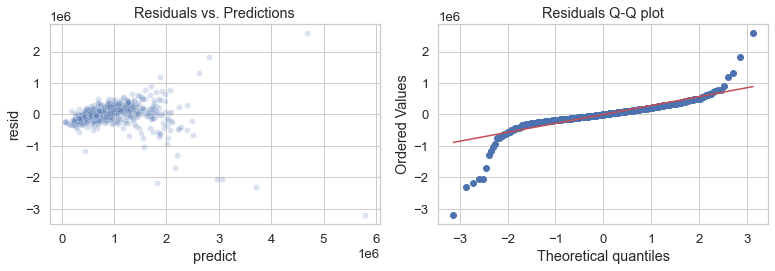

In [269]:
# Plot your predicted values on the x-axis, and your residuals on the y-axis
fig, axes = plt.subplots(1, 2, figsize=(11, 4))

sns.scatterplot(data=df_SFH_res, x='predict', y='resid', alpha=0.2, ax=axes[0])
stats.probplot(df_SFH_res['resid'], dist="norm", plot=axes[1])

axes[0].set_title("Residuals vs. Predictions")
axes[1].set_title("Residuals Q-Q plot")

plt.tight_layout()

# Residual Plots show massive outliers causing overfitting. As all other options with the given data set have been exhausted, a lower and upper limit are applied*.

* With more time, obvious answer would be to extract more datapoints from the internet, including distance data as well as tax information completed by the city. However, time not available to complete further research.

In [637]:
upper = df_SFH['Price'].quantile(.05)
lower = df_SFH['Price'].quantile(.95)
df_SFH_bound=df_SFH[df_SFH['Price'].between(upper, lower)].copy()

Upper and lower bounds set to five percent. All data reflects single family home prices between 400 K and 1.9M (also the 95th percentile (lower bound) of properties in my dataset is 400K - WOW. requires further study, possibly more data extraction from online.

In [638]:
print(upper, lower)

399999.10000000003 1886699.9999999998


In [308]:
df_SFH_res2.head()

,Price,beds,Year_Built,Bathroom,Patio,Air_Conditioning,Garage_-_Attached,Brick,Vinyl_(F),Interior_Sq_Ft,Exterior_Acres,zipcode_median,Neighborhood_median,Miles to Penn Station,Fare Zone,predict,resid
0,1650000.0,4.0,2003.0,4.0,0.0,1.0,1.0,1.0,0.0,3000.0,0.09,1150000.0,1209500.0,7.5,3.0,1.699961e+06,49960.874583
1,1599000.0,4.0,1965.0,3.0,0.0,1.0,1.0,0.0,0.0,2800.0,0.18,1150000.0,1209500.0,7.5,3.0,1.599560e+06,559.763276
2,1499000.0,4.0,2003.0,4.0,1.0,1.0,1.0,1.0,0.0,3180.0,0.10,1150000.0,1209500.0,7.5,3.0,1.709426e+06,210425.997220
3,1399000.0,4.0,1960.0,4.0,1.0,1.0,1.0,0.0,0.0,2400.0,0.10,1150000.0,1209500.0,7.5,3.0,1.468986e+06,69985.968127
4,2788000.0,4.0,2020.0,5.0,0.0,0.0,1.0,1.0,0.0,4000.0,0.12,1150000.0,1209500.0,7.5,3.0,2.032287e+06,-755713.115093


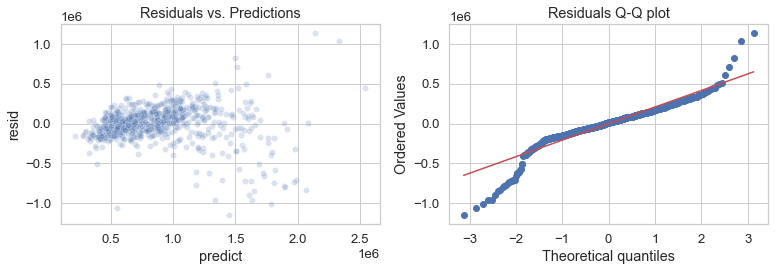

In [309]:
cols2=df_SFH.columns
X_res2=df_SFH_bound.drop('Price', axis=1).copy()
y_res2=df_SFH_bound['Price'].copy()
df_SFH_res2 = df_SFH_bound.copy()

lr=LinearRegression()
fit=lr.fit(X_res2, y_res2)

df_SFH_res2['predict']=fit.predict(X_res2)
df_SFH_res2['resid']=df_SFH_res2.predict-y_res2

fig, axes = plt.subplots(1, 2, figsize=(11, 4))

sns.scatterplot(data=df_SFH_res2, x='predict', y='resid', alpha=0.2, ax=axes[0])
stats.probplot(df_SFH_res2['resid'], dist="norm", plot=axes[1])

axes[0].set_title("Residuals vs. Predictions")
axes[1].set_title("Residuals Q-Q plot")

plt.tight_layout()

# After looking at post-outlier data, further analysis and feature engineering needed to reduce overfitting:

In [314]:
df_poly_X=df_SFH_res2.drop(['predict', 'resid', 'Price'], axis=1).copy()
df_poly_y=df_SFH_res2['Price'].copy()

p = PolynomialFeatures()
X_poly = p.fit_transform(df_poly_X)


poly_cv_results(X_poly, df_poly_y, model=LassoCV(normalize=True), scoring='r2', rounding=4, cv=5, minimize_score=False)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3812039415.3515625, tolerance: 3147091157.6199985
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4502145114.022461, tolerance: 3147091157.6199985
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5372205894.714844, tolerance: 3147091157.6199985
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8185656149.267578, tolerance: 7009734537.5829315
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 80073882388.69727, tolerance: 8284981034.085722
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10181961487.03125, tolerance: 8901227728.755356
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: Conver

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9107247389.660156, tolerance: 7959084952.74625
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10879666029.792969, tolerance: 7959084952.74625
  model = cd_fast.enet_coordinate_descent_gram(


Test r2 :               Mean = 0.5866	Range = (0.3951, 0.7486)
Train/Test r2 Ratio :   Mean = 1.5507	Range = (1.1525, 2.2107)


Test Scores: [0.74863641 0.67878753 0.51146627 0.5989158  0.3951432 ]
Train Scores: [0.86277586 0.84316166 0.87741002 0.85800631 0.87355221]

Best Model Feature coefficient results:
1:               0.00
beds:            0.00
Year_Built:      0.00
Bathroom:        0.00
Patio:           -0.00
Air_Conditioning: -0.00
Garage_-_Attached: -0.00
Brick:           -0.00
Vinyl_(F):       0.00
Interior_Sq_Ft:  0.00
Exterior_Acres:  0.00
zipcode_median:  0.00
Neighborhood_median: -0.00
Miles to Penn Station: -0.00
Fare Zone:       225.06
beds^2:          -1525.86
beds Year_Built: 11.57
beds Bathroom:   -0.00
beds Patio:      0.00
beds Air_Conditioning: 6212.87
beds Garage_-_Attached: 0.00
beds Brick:      -5469.16
beds Vinyl_(F):  0.00
beds Interior_Sq_Ft: -18.23
beds Exterior_Acres: 0.00
beds zipcode_median: 0.00
beds Neighborhood_median: 0.04
beds Miles to Penn Station

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30387641833.421875, tolerance: 10500716395.948786
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 47929911551.73047, tolerance: 10500716395.948786
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30056508123.121094, tolerance: 10500716395.948786
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:52

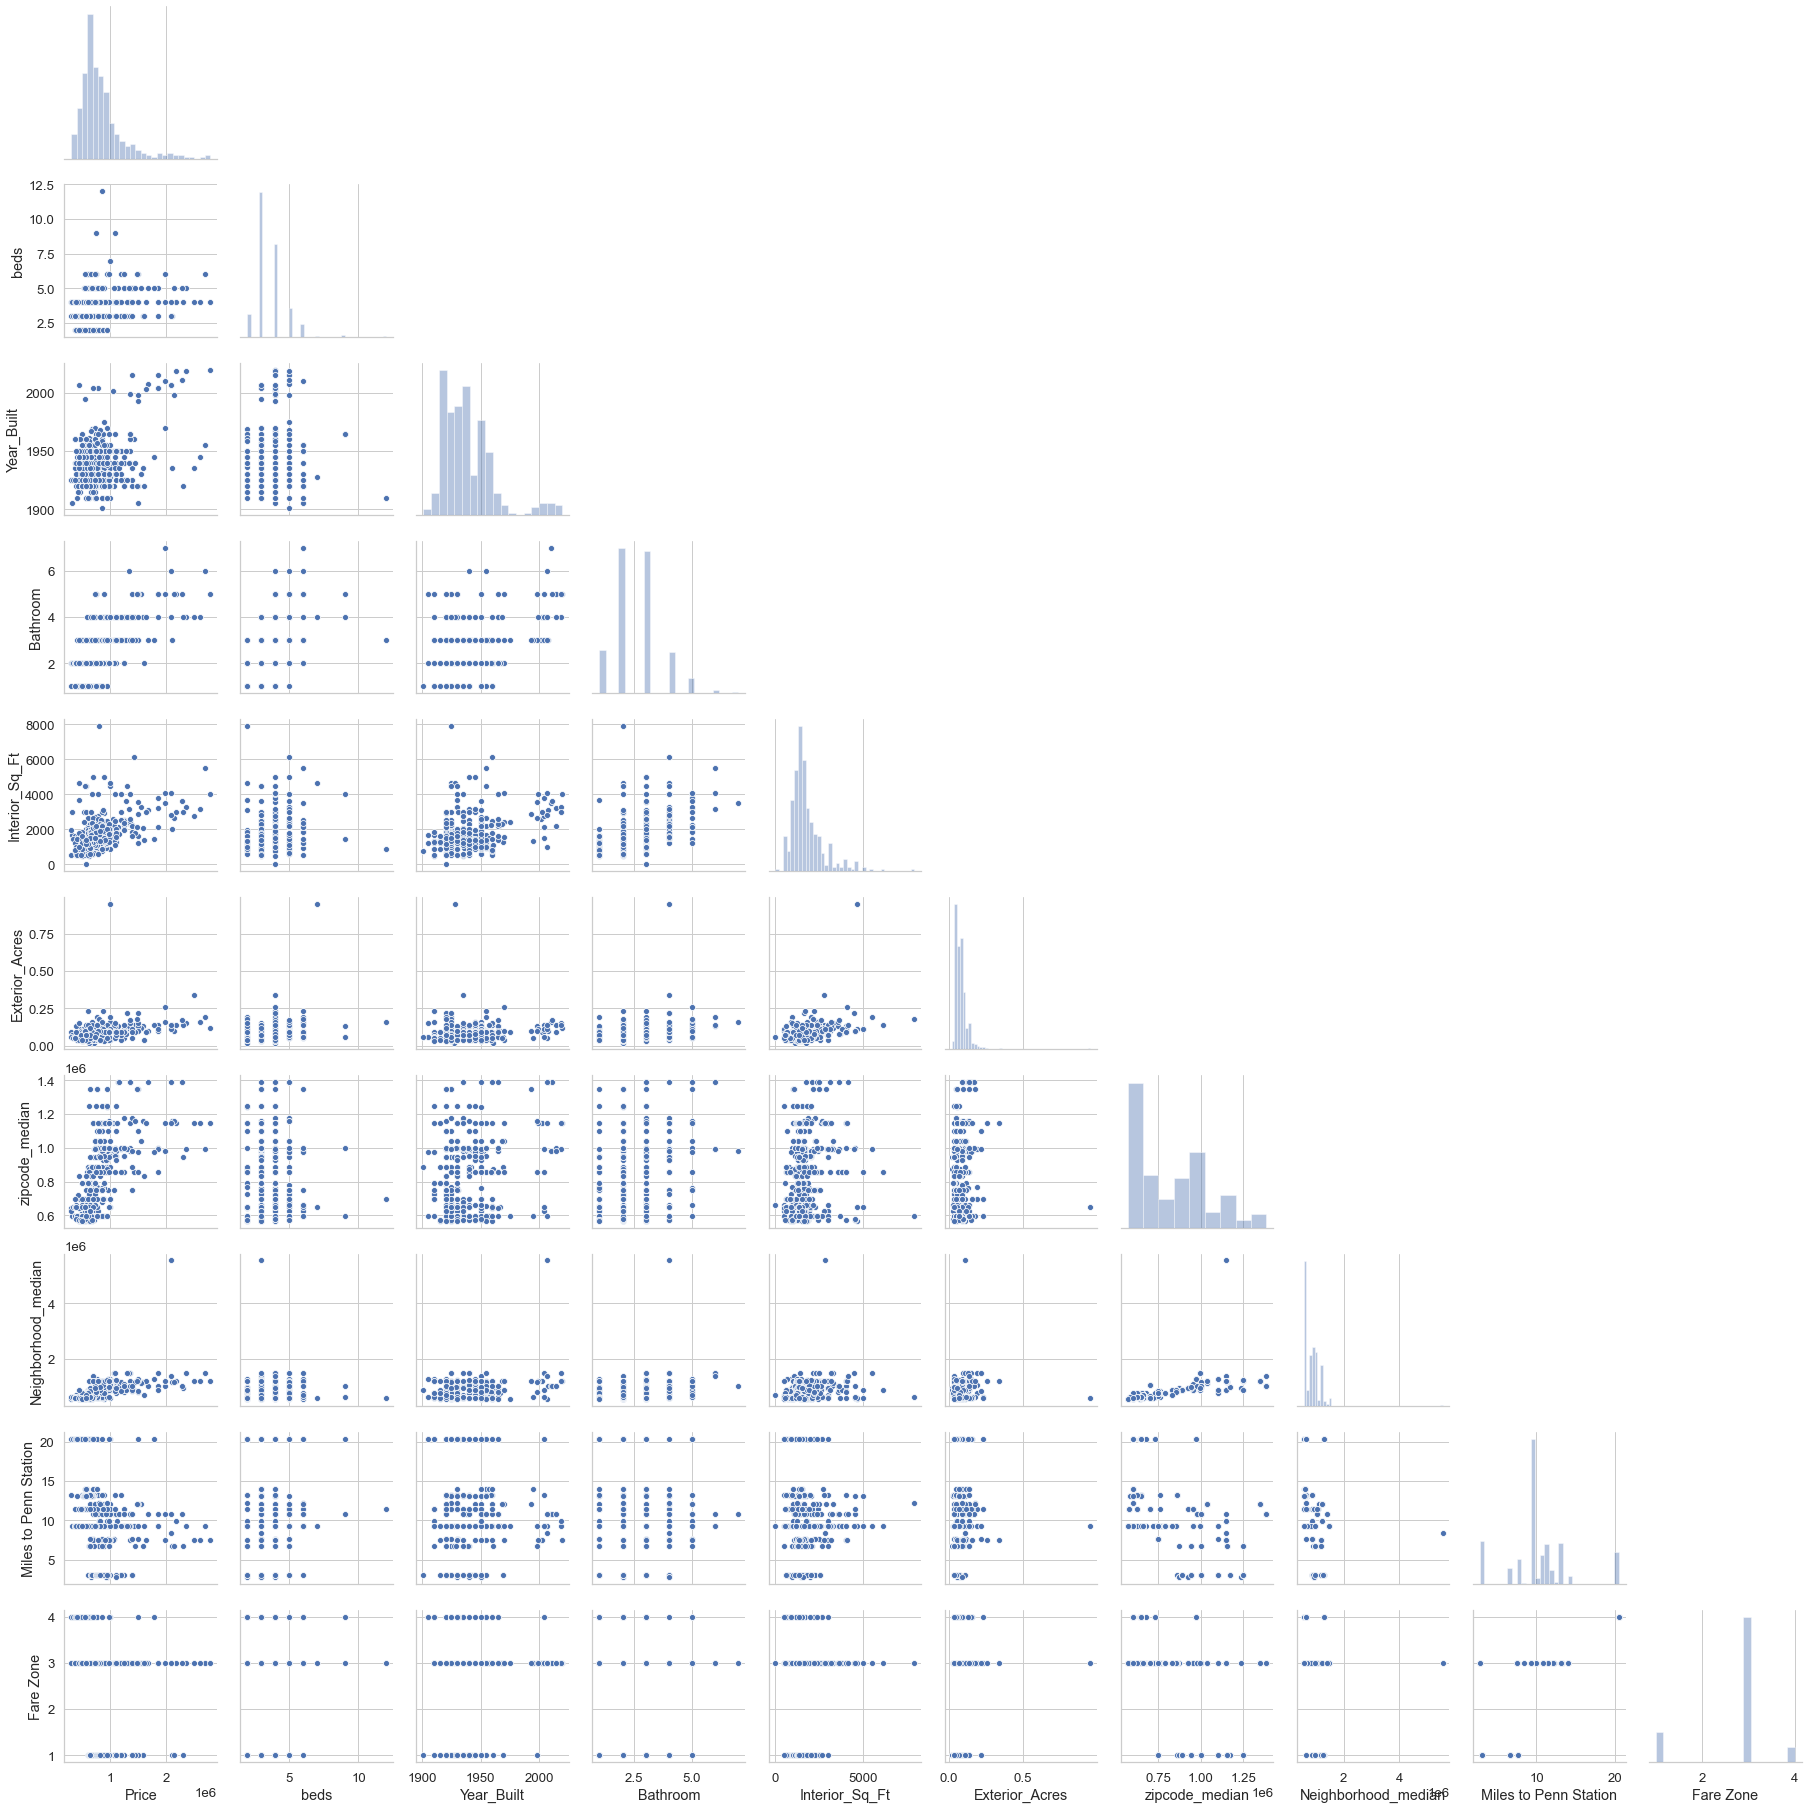

In [321]:
%config InlineBackend.figure_formats = ['png']

g = sns.PairGrid(df_display.sample(frac=0.5), diag_sharey=False, corner=True)
g.map_lower(sns.scatterplot)
g.map_diag(sns.distplot, kde=False)

In [317]:
df_SFH_res2.head()

,Price,beds,Year_Built,Bathroom,Patio,Air_Conditioning,Garage_-_Attached,Brick,Vinyl_(F),Interior_Sq_Ft,Exterior_Acres,zipcode_median,Neighborhood_median,Miles to Penn Station,Fare Zone,predict,resid
0,1650000.0,4.0,2003.0,4.0,0.0,1.0,1.0,1.0,0.0,3000.0,0.09,1150000.0,1209500.0,7.5,3.0,1.569783e+06,-8.021681e+04
1,1599000.0,4.0,1965.0,3.0,0.0,1.0,1.0,0.0,0.0,2800.0,0.18,1150000.0,1209500.0,7.5,3.0,1.424769e+06,-1.742313e+05
2,1499000.0,4.0,2003.0,4.0,1.0,1.0,1.0,1.0,0.0,3180.0,0.10,1150000.0,1209500.0,7.5,3.0,1.576012e+06,7.701175e+04
3,1399000.0,4.0,1960.0,4.0,1.0,1.0,1.0,0.0,0.0,2400.0,0.10,1150000.0,1209500.0,7.5,3.0,1.378371e+06,-2.062915e+04
4,2788000.0,4.0,2020.0,5.0,0.0,0.0,1.0,1.0,0.0,4000.0,0.12,1150000.0,1209500.0,7.5,3.0,1.782501e+06,-1.005499e+06


# Cutting down using sns.pairplot (above) to help point in right direction:

In [593]:
df_display=df_SFH_res2[['Price', 'beds', 'Year_Built', 'Bathroom', 'Interior_Sq_Ft', 'Exterior_Acres', 'zipcode_median', 'Neighborhood_median', 'Miles to Penn Station', 'Fare Zone']]

In [350]:
df_adj=df_display.copy()

In [351]:
df_adj['Bath^2']=df_adj['Bathroom']**2

In [352]:
df_adj.drop('Bathroom', axis=1, inplace=True)

# Looks like some outliers in exterior acres make it hard to see relationship. Cleaning exterior acres:

In [361]:
df_adj[df_adj['Exterior_Acres']>.5].head()

,Price,beds,Year_Built,Interior_Sq_Ft,Exterior_Acres,zipcode_median,Neighborhood_median,Miles to Penn Station,Fare Zone,Bath^2
317,799000.0,4.0,1940.0,1623.0,0.53,995000.0,884000.0,9.3,3.0,9.0
644,999999.0,7.0,1928.0,4650.0,0.95,649000.0,590000.0,9.3,3.0,16.0


In [359]:
df_adj.shape

(785, 10)

In [360]:
df_adj.reset_index(drop=True, inplace=True)

In [362]:
df_adj.drop([317, 644])

,Price,beds,Year_Built,Interior_Sq_Ft,Exterior_Acres,zipcode_median,Neighborhood_median,Miles to Penn Station,Fare Zone,Bath^2
0,1650000.0,4.0,2003.0,3000.0,0.09,1150000.0,1209500.0,7.5,3.0,16.0
1,1599000.0,4.0,1965.0,2800.0,0.18,1150000.0,1209500.0,7.5,3.0,9.0
2,1499000.0,4.0,2003.0,3180.0,0.10,1150000.0,1209500.0,7.5,3.0,16.0
3,1399000.0,4.0,1960.0,2400.0,0.10,1150000.0,1209500.0,7.5,3.0,16.0
4,2788000.0,4.0,2020.0,4000.0,0.12,1150000.0,1209500.0,7.5,3.0,25.0
...,...,...,...,...,...,...,...,...,...,...
780,1100000.0,3.0,1940.0,1944.0,0.09,975000.0,1299500.0,20.4,4.0,16.0
781,999999.0,3.0,1940.0,810.0,0.09,975000.0,1299500.0,20.4,4.0,9.0
782,995000.0,3.0,1910.0,875.0,0.09,975000.0,1299500.0,20.4,4.0,9.0
783,1499000.0,4.0,2005.0,700.0,0.09,975000.0,889000.0,20.4,4.0,16.0


# Final adjustments attempt no. 1: doesnt quite work out the way I like. Feel free to skip to final adjustments no. 2 where I gave it another shot (more successfully) from this point.

In [446]:
#Save
df_adj2=df_adj.copy()
#Drop Zipcode
df_adj2['zip_med_log20']=np.log(df_adj2['zipcode_median'])/np.log(20)
df_adj2.drop('zipcode_median', axis=1, inplace=True)
df_adj2.drop('zip_med_log20', axis=1, inplace=True)
#drop Fair Zone
df_adj2.drop('Fare Zone', axis=1, inplace=True)

df_adj2['neigh_med_log60']=np.log(df_adj2['Neighborhood_median'])/np.log(200)
df_adj2.drop('Neighborhood_median', axis=1, inplace=True)

df_adj2['exteriorlog1000']=np.log(df_adj2['Exterior_Acres'])/np.log(10000)
df_adj2.drop('Exterior_Acres', axis=1, inplace=True)

#Combine distance to Manhattan and Exterior
df_adj2['dist*extlg1000']=df_adj2['Miles to Penn Station']*df_adj2['exteriorlog1000']
df_adj2.drop('Miles to Penn Station', axis=1, inplace=True)
df_adj2.drop('exteriorlog1000', axis=1, inplace=True)

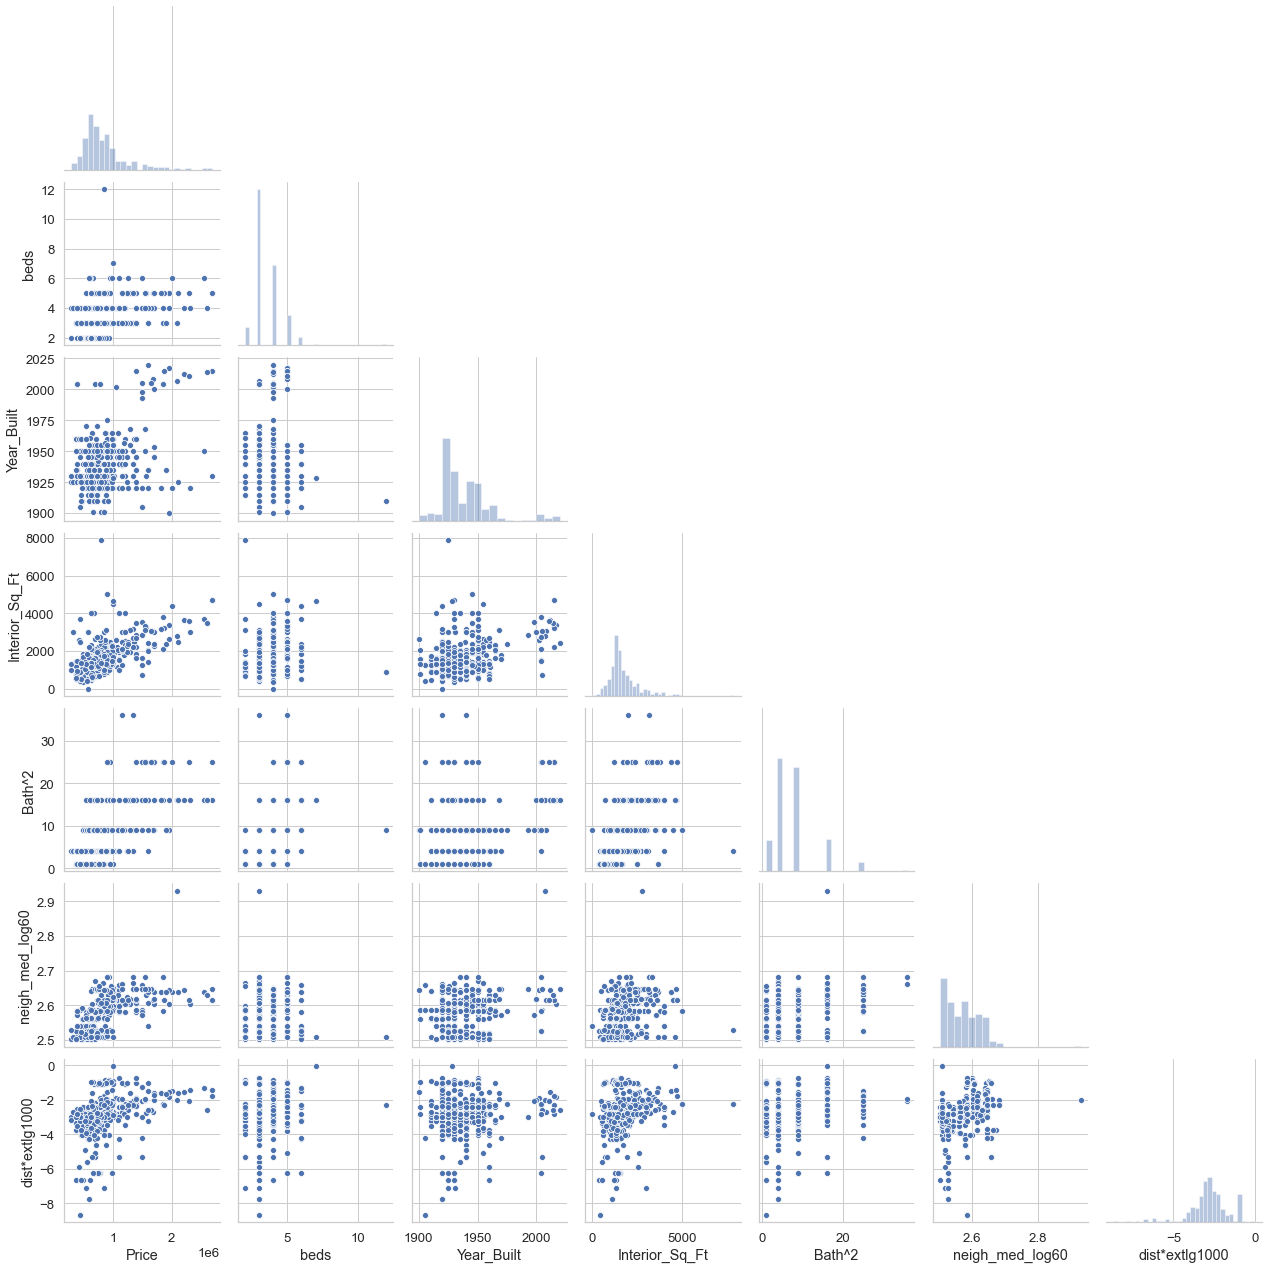

In [447]:
%config InlineBackend.figure_formats = ['png']

g = sns.PairGrid(df_adj2.sample(frac=0.5), diag_sharey=True, corner=True)
g.map_lower(sns.scatterplot)
g.map_diag(sns.distplot, kde=False)

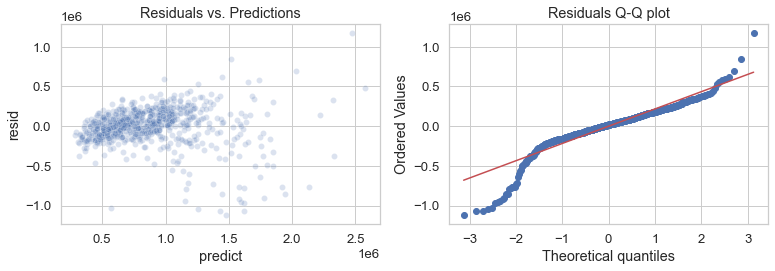

In [448]:
cols3=df_adj2.columns
X_res3=df_adj2.drop('Price', axis=1).copy()
y_res3=df_adj2['Price'].copy()
df_SFH_res3 = df_adj2.copy()

lr=LinearRegression()
fit=lr.fit(X_res3, y_res3)

df_SFH_res3['predict']=fit.predict(X_res3)
df_SFH_res3['resid']=df_SFH_res3.predict-y_res3

fig, axes = plt.subplots(1, 2, figsize=(11, 4))

sns.scatterplot(data=df_SFH_res3, x='predict', y='resid', alpha=0.2, ax=axes[0])
stats.probplot(df_SFH_res3['resid'], dist="norm", plot=axes[1])

axes[0].set_title("Residuals vs. Predictions")
axes[1].set_title("Residuals Q-Q plot")

plt.tight_layout()

In [449]:
#Lin regression on adjusted data

df_adj2_reg_X=df_adj2.drop('Price', axis=1).copy()
df_adj2_reg_y=df_adj2['Price'].copy()

In [450]:
cv_results(df_adj2_reg_X, df_adj2_reg_y, df_adj2_reg_X, model=LinearRegression(normalize=True), scoring='r2', rounding=4, cv=5, minimize_score=False)

Test r2 :               Mean = 0.4961	Range = (0.2705, 0.6088)
Train/Test r2 Ratio :   Mean = 1.5834	Range = (1.1351, 2.6392)


Test Scores: [0.59467646 0.60792806 0.39864755 0.27054622 0.60876454]
Train Scores: [0.71350478 0.69182656 0.71940583 0.71403566 0.6910228 ]

Best Model Feature coefficient results:
beds:            33411.02
Year_Built:      2730.67
Interior_Sq_Ft:  113.29
Bath^2:          20261.47
neigh_med_log60: 3069407.71
dist*extlg1000:  28281.22


In [456]:
cv_results(df_adj2_reg_X, df_adj2_reg_y, df_adj2_reg_X, model=RidgeCV(normalize=True), scoring='r2', rounding=4, cv=5, minimize_score=False)

Test r2 :               Mean = 0.5011	Range = (0.3217, 0.6002)
Train/Test r2 Ratio :   Mean = 1.5009	Range = (1.1584, 2.2145)


Test Scores: [0.60018341 0.59509057 0.40755165 0.32165714 0.58115468]
Train Scores: [0.71108104 0.68938179 0.71749884 0.71232398 0.68951839]

Best Model Feature coefficient results:
beds:            27748.32
Year_Built:      3071.72
Interior_Sq_Ft:  59.97
Bath^2:          18650.71
neigh_med_log60: 3581617.20
dist*extlg1000:  21079.23


In [453]:
df_poly_adj2_X=df_adj2.drop('Price', axis=1).copy()
df_poly_adj2_y=df_adj2['Price'].copy()

p = PolynomialFeatures()
X_poly = p.fit_transform(df_poly_adj2_X)

In [454]:
poly_cv_results(X_poly, df_poly_adj2_y, df_poly_adj2_X, model=RidgeCV(normalize=True), scoring='r2', rounding=4, cv=5, minimize_score=False)

Test r2 :               Mean = 0.5377	Range = (0.4324, 0.6383)
Train/Test r2 Ratio :   Mean = 1.418	Range = (1.1623, 1.724)


Test Scores: [0.63831441 0.58072052 0.44029443 0.43236985 0.5967092 ]
Train Scores: [0.74192898 0.73149944 0.75201692 0.74542608 0.73738576]

Best Model Feature coefficient results:
1:               0.00
beds:            14461.99
Year_Built:      778.17
Interior_Sq_Ft:  42.00
Bath^2:          8682.07
neigh_med_log60: 1269105.78
dist*extlg1000:  -1087.82
beds^2:          -943.65
beds Year_Built: 8.13
beds Interior_Sq_Ft: -6.31
beds Bath^2:     -285.03
beds neigh_med_log60: 9360.08
beds dist*extlg1000: 764.41
Year_Built^2:    0.24
Year_Built Interior_Sq_Ft: 0.02
Year_Built Bath^2: 4.95
Year_Built neigh_med_log60: 517.79
Year_Built dist*extlg1000: 0.59
Interior_Sq_Ft^2: -0.01
Interior_Sq_Ft Bath^2: 1.06
Interior_Sq_Ft neigh_med_log60: 20.68
Interior_Sq_Ft dist*extlg1000: 13.18
Bath^2^2:        -82.29
Bath^2 neigh_med_log60: 3864.97
Bath^2 dist*extlg1000: 3236.13
ne

In [399]:
df_adj2.head()

,Price,beds,Year_Built,Interior_Sq_Ft,Miles to Penn Station,Fare Zone,Bath^2,zip_med_log20,neigh_med_log130,exteriorlog30
0,1650000.0,4.0,2003.0,3000.0,7.5,3.0,16.0,4.658384,4.117879,-0.707970
1,1599000.0,4.0,1965.0,2800.0,7.5,3.0,9.0,4.658384,4.117879,-0.504175
2,1499000.0,4.0,2003.0,3180.0,7.5,3.0,16.0,4.658384,4.117879,-0.676992
3,1399000.0,4.0,1960.0,2400.0,7.5,3.0,16.0,4.658384,4.117879,-0.676992
4,2788000.0,4.0,2020.0,4000.0,7.5,3.0,25.0,4.658384,4.117879,-0.623387


# Final Analysis no. 2:

In [458]:
df_SFH.columns

Index(['Price', 'beds', 'Year_Built', 'Bathroom', 'Patio', 'Air_Conditioning', 'Garage_-_Attached', 'Brick', 'Vinyl_(F)', 'Interior_Sq_Ft', 'Exterior_Acres', 'zipcode_median', 'Neighborhood_median', 'Miles to Penn Station', 'Fare Zone'], dtype='object')

In [639]:
df_PV=df_SFH_bound[['Price', 'beds', 'Year_Built', 'Bathroom', 'Air_Conditioning', 'Interior_Sq_Ft', 'Exterior_Acres', 'zipcode_median', 'Neighborhood_median', 'Fare Zone']].copy()

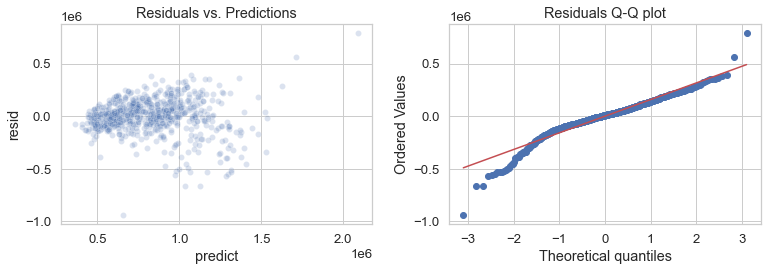

In [708]:
cols2=df_PV.columns
X_res3=df_PV.drop('Price', axis=1).copy()
y_res3=df_PV['Price'].copy()
df_SFH_res3 = df_PV.copy()

lr=LinearRegression()
fit=lr.fit(X_res3, y_res3)

df_SFH_res3['predict']=fit.predict(X_res3)
df_SFH_res3['resid']=df_SFH_res3.predict-y_res3

fig, axes = plt.subplots(1, 2, figsize=(11, 4))

sns.scatterplot(data=df_SFH_res3, x='predict', y='resid', alpha=0.2, ax=axes[0])
stats.probplot(df_SFH_res3['resid'], dist="norm", plot=axes[1])

axes[0].set_title("Residuals vs. Predictions")
axes[1].set_title("Residuals Q-Q plot")

plt.tight_layout()

In [706]:
#OLS check for results

df_lin2_X=df_PV.drop('Price', axis=1).copy()
df_lin2_y=df_PV['Price'].copy()
df_lin2=df_PV.copy()

#Create the model
model = sm.OLS(df_lin2_y, sm.add_constant(df_lin2_X)) 

#Fit
fit = model.fit()

#Print out summary
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     266.0
Date:                Fri, 09 Oct 2020   Prob (F-statistic):          2.82e-178
Time:                        01:47:16   Log-Likelihood:                -9674.8
No. Observations:                 721   AIC:                         1.936e+04
Df Residuals:                     714   BIC:                         1.940e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -8.717e+06   3.42e+05    -25.473      0.000   -9.39e+06   -8.05e+06
Air_Conditioning  6.074e+04   1.26e+04      4.820      0.000     3.6e+04    8.55e+04
Neigh*Ziplog50    2.309e+06   8.83e+04     26.149      0.000    2.14e+06    2.48e+06
Bathroom^2         1.54e+04   1316.777     11.696      0.000    1.28e+04     1.8e+04
Exterior*Fare     1.351e+04   3962.172      3.409      0.001    5729.202    2.13e+04
Int_Sq_Ft         6463.6454    772.357      8.369      0.000    4947.284    7980.007
Bed10^              49.1259     34.008      1.445      0.149     -17.642     115.894
==============================================================================
Omnibus:                      131.399   Durbin-Watson:                   1.361
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              506.169
Skew:                           0.804   Prob(JB):                    1.22e-110
Kurtosis:                       6.776   Cond. No.                     1.22e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.22e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [705]:
#Lin regression on adjusted data

df_PV_reg_X=df_PV.drop('Price', axis=1).copy()
df_PV_reg_y=df_PV['Price'].copy()

cv_results(df_PV_reg_X, df_PV_reg_y, df_PV_reg_X, model=LinearRegression(normalize=True), scoring='r2', rounding=4, cv=5, minimize_score=False)



Test r2 :               Mean = 0.5747	Range = (0.505, 0.6579)
Train/Test r2 Ratio :   Mean = 1.2097	Range = (1.0212, 1.3832)


Test Scores: [0.57066842 0.54891816 0.50501156 0.59084961 0.65792041]
Train Scores: [0.69314508 0.69181842 0.6985498  0.69090526 0.67186051]

Best Model Feature coefficient results:
Air_Conditioning: 68981.66
Neigh*Ziplog50:  2136673.85
Bathroom^2:      13604.46
Exterior*Fare:   15122.92
Int_Sq_Ft:       7767.76
Bed10^:          57.54


In [643]:
df_PV1=df_PV.copy()

In [707]:
#Neighborhood & Zipcode:
df_PV=df_PV1.copy()
df_PV['Neigh*Zip']=df_PV['Neighborhood_median']*df_PV['zipcode_median']
df_PV.drop('Neighborhood_median', axis=1, inplace=True)
df_PV.drop('zipcode_median', axis=1, inplace=True)
df_PV['Neigh*Ziplog50']=np.log(df_PV['Neigh*Zip'])/np.log(1000)
df_PV.drop('Neigh*Zip', axis=1, inplace=True)

df_PV.drop('Year_Built', axis=1, inplace=True)

df_PV['Bathroom^2']=df_PV['Bathroom']**2
df_PV.drop('Bathroom', axis=1, inplace=True)

df_PV['Exterior*Fare']=df_PV['Exterior_Acres']*df_PV['Fare Zone']*10
df_PV.drop('Exterior_Acres', axis=1, inplace=True)
df_PV.drop('Fare Zone', axis=1, inplace=True)

df_PV['Int_Sq_Ft']=df_PV['Interior_Sq_Ft']**0.5
df_PV.drop('Interior_Sq_Ft', axis=1, inplace=True)

df_PV['Bed10^3.3']=(df_PV['beds'])**3.33
df_PV.drop('beds', axis=1, inplace=True)

df_PV.reset_index(drop=True, inplace=True)
df_PV.drop([284, 590])


,Price,Air_Conditioning,Neigh*Ziplog50,Bathroom^2,Exterior*Fare,Int_Sq_Ft,Bed10^3.3
0,1650000.0,1.0,4.047768,16.0,2.7,54.772256,101.125288
1,1599000.0,1.0,4.047768,9.0,5.4,52.915026,101.125288
2,1499000.0,1.0,4.047768,16.0,3.0,56.391489,101.125288
3,1399000.0,1.0,4.047768,16.0,3.0,48.989795,101.125288
4,1525000.0,1.0,4.047768,16.0,3.6,60.000000,101.125288
...,...,...,...,...,...,...,...
716,1100000.0,0.0,4.034260,16.0,3.6,44.090815,38.798397
717,999999.0,1.0,4.034260,9.0,3.6,28.460499,38.798397
718,995000.0,1.0,4.034260,9.0,3.6,29.580399,38.798397
719,1499000.0,1.0,3.979302,16.0,3.6,26.457513,101.125288


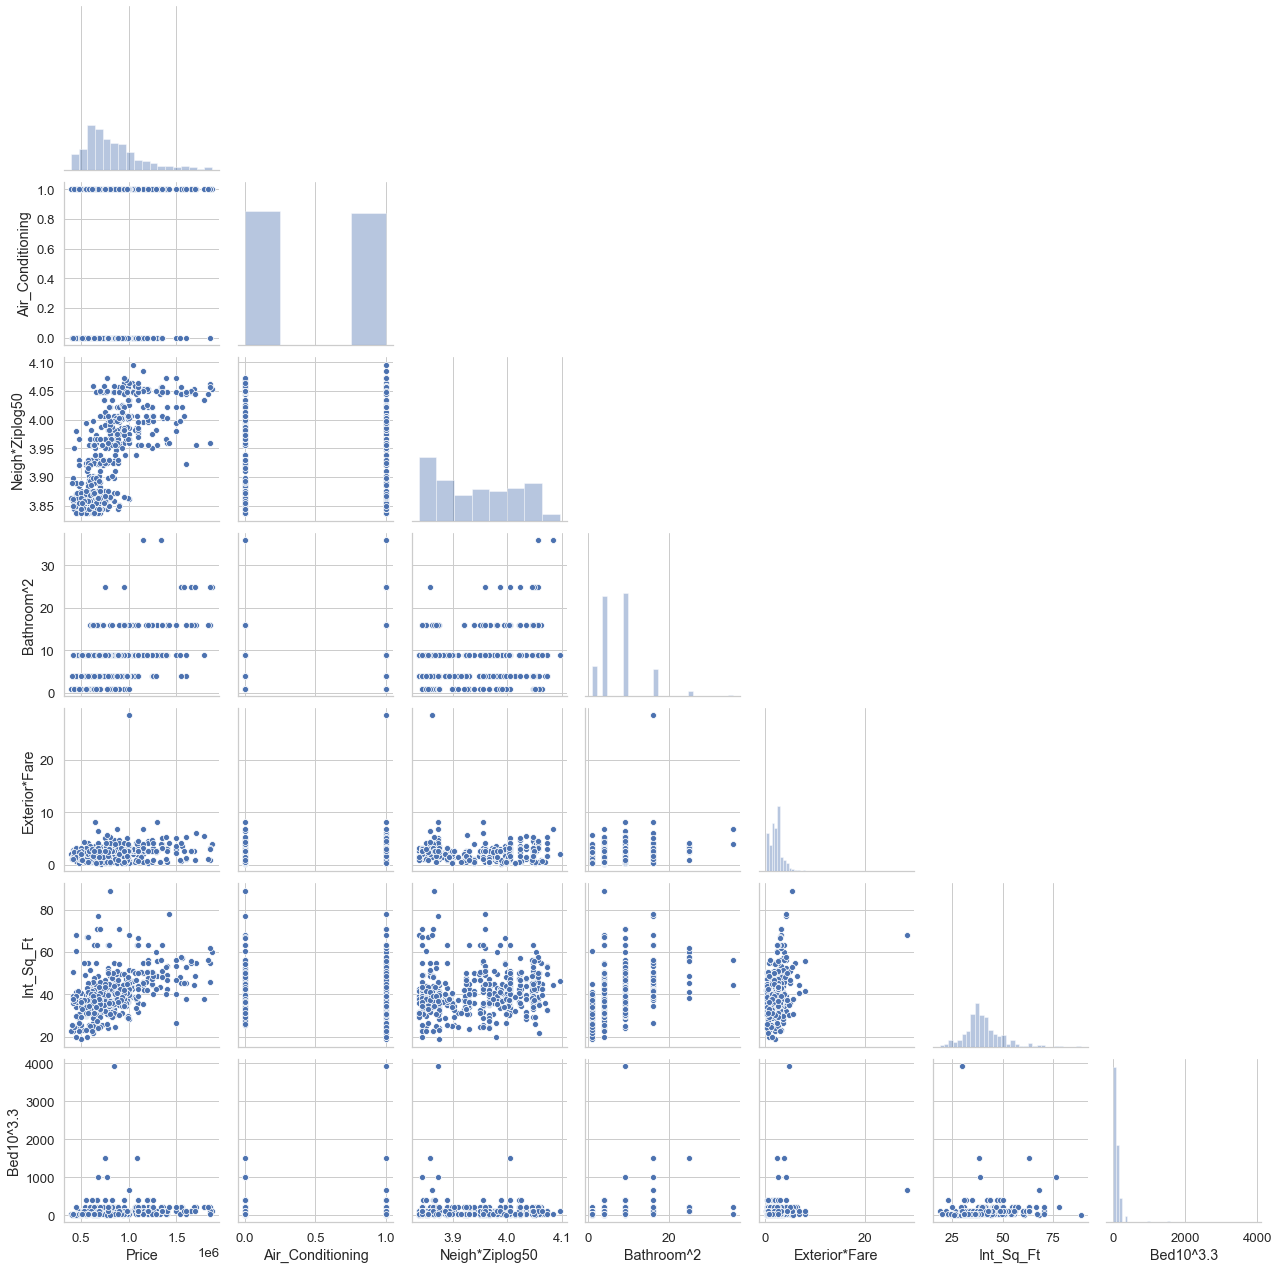

In [711]:
%config InlineBackend.figure_formats = ['png']

g = sns.PairGrid(df_PV.sample(frac=0.7), diag_sharey=True, corner=True)
g.map_lower(sns.scatterplot)
g.map_diag(sns.distplot, kde=False)

In [642]:
df_PV[df_PV['Exterior_Acres']>.5].head()

,Price,beds,Year_Built,Bathroom,Air_Conditioning,Interior_Sq_Ft,Exterior_Acres,zipcode_median,Neighborhood_median,Fare Zone
284,799000.0,4.0,1940.0,3.0,1.0,1623.0,0.53,995000.0,884000.0,3.0
590,999999.0,7.0,1928.0,4.0,1.0,4650.0,0.95,649000.0,590000.0,3.0


# Realized I forgot to remove exterior acres. Identified proper rows and re-ran above script.

In [641]:
df_PV.reset_index(drop=True, inplace=True)

In [536]:
df_PV.shape

(713, 8)